In [47]:
%pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from catboost import CatBoostClassifier
import joblib
from xgboost import XGBClassifier
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/network-intrusion-system-nisha/Train_data.csv/Train_data.csv
/kaggle/input/network-intrusion-system-nisha/Test_data.csv/Test_data.csv


# Data Preprocessing and EDA

In [49]:
import os

# Directory path
directory_path = '/kaggle/input/network-intrusion-system-nisha'

# List contents of the directory
print(os.listdir(directory_path))


['Train_data.csv', 'Test_data.csv']


In [50]:
import pandas as pd
train = pd.read_csv('/kaggle/input/network-intrusion-system-nisha/Train_data.csv/Train_data.csv')

In [51]:
test = pd.read_csv('/kaggle/input/network-intrusion-system-nisha/Test_data.csv/Test_data.csv')

In [52]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [54]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [55]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
train.describe(include='object')
#count: The number of non-null entries in each column.
#unique: The number of unique values in each column.
#top: The most frequent value in each column.
#freq: The frequency of the most frequent value in each column.

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [57]:
train.shape

(25192, 42)

**MISSING DATA**

In [58]:
is_null = train.isnull()
is_null

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum()>0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total)*100
    print(f"{col}:{null_count}({round(per,3)}%)")
if missing_columns:
    print("Columns with missing values:", missing_columns)
else:
    print("No missing values")

No missing values


DUPLICATES

In [60]:
if (train.duplicated().sum()>0):
    print(f"No.of duplicates : {train.duplicated().sum()}")
else:
    print("No duplicate values")
    

No duplicate values


**DATA VISUALIZATION**

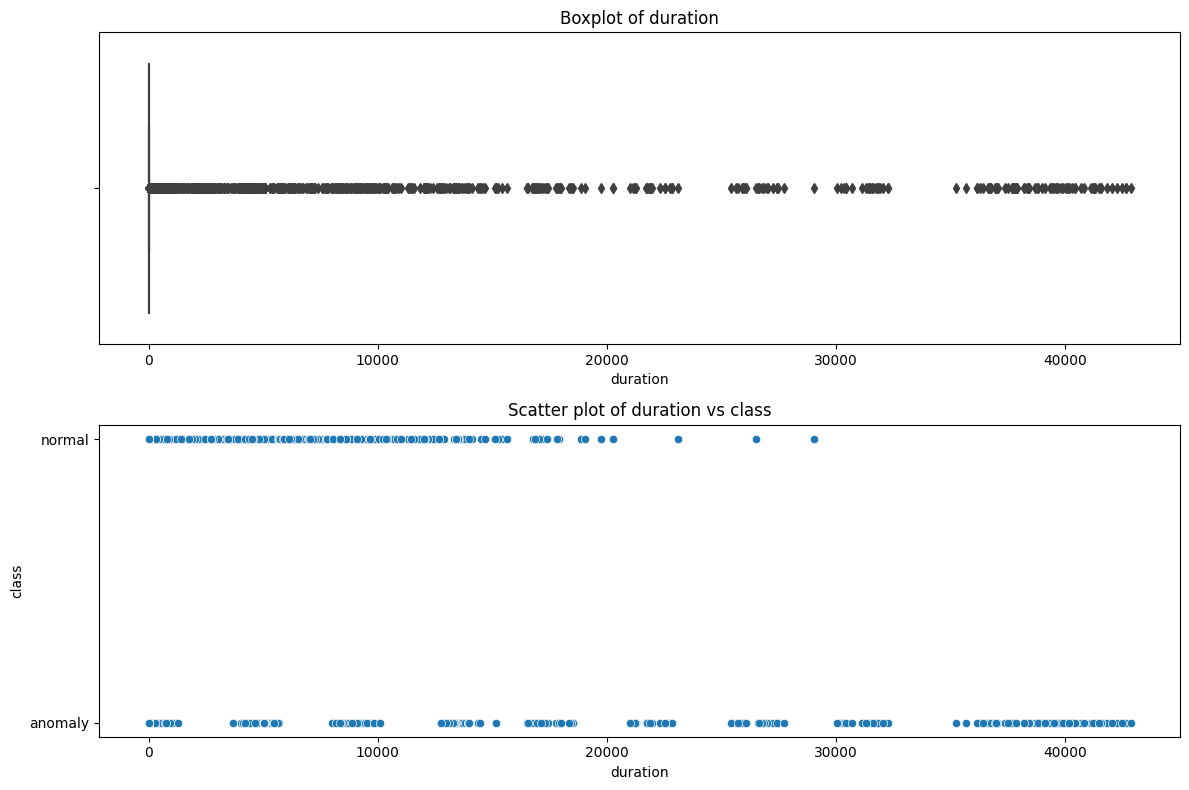

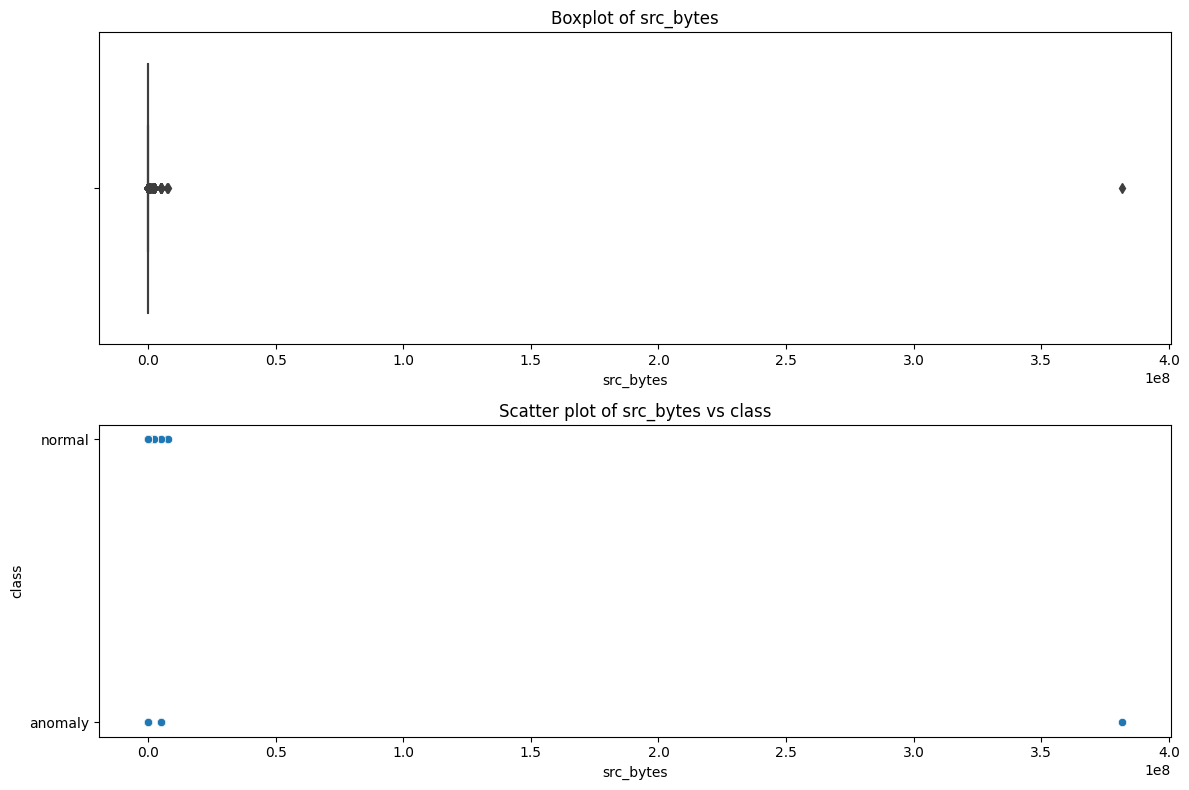

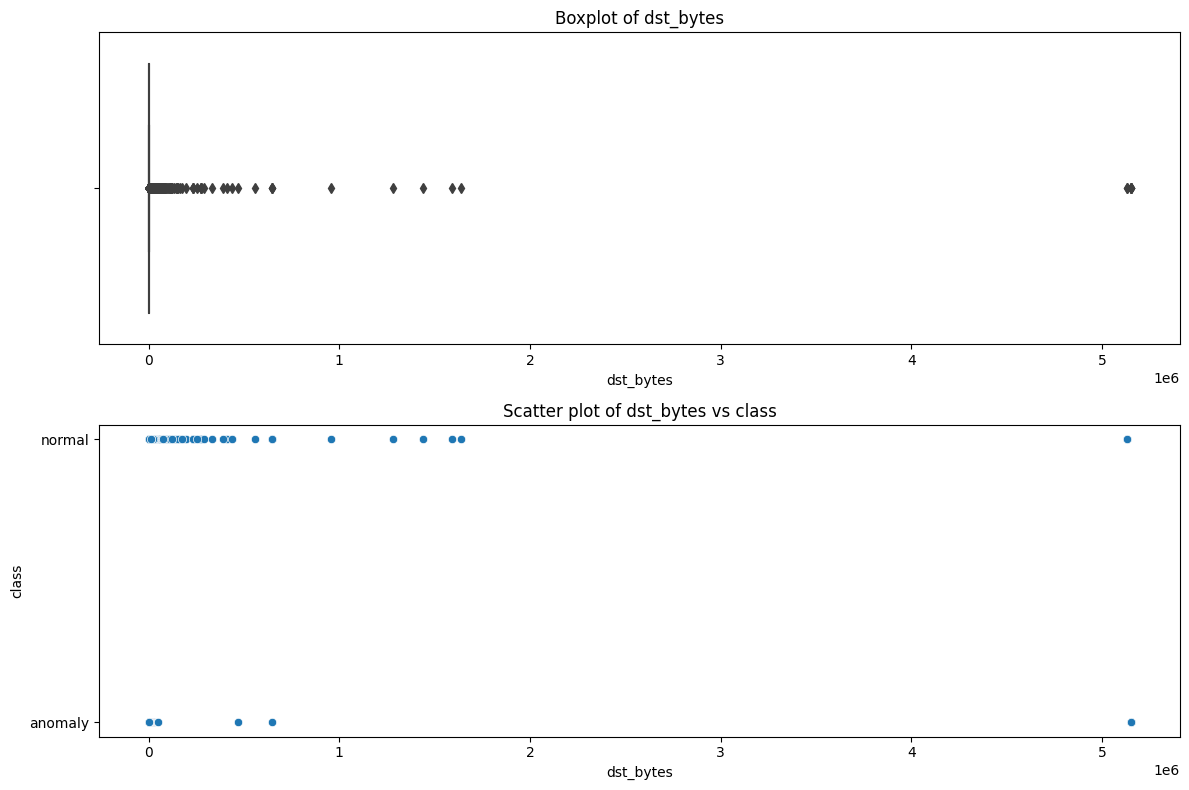

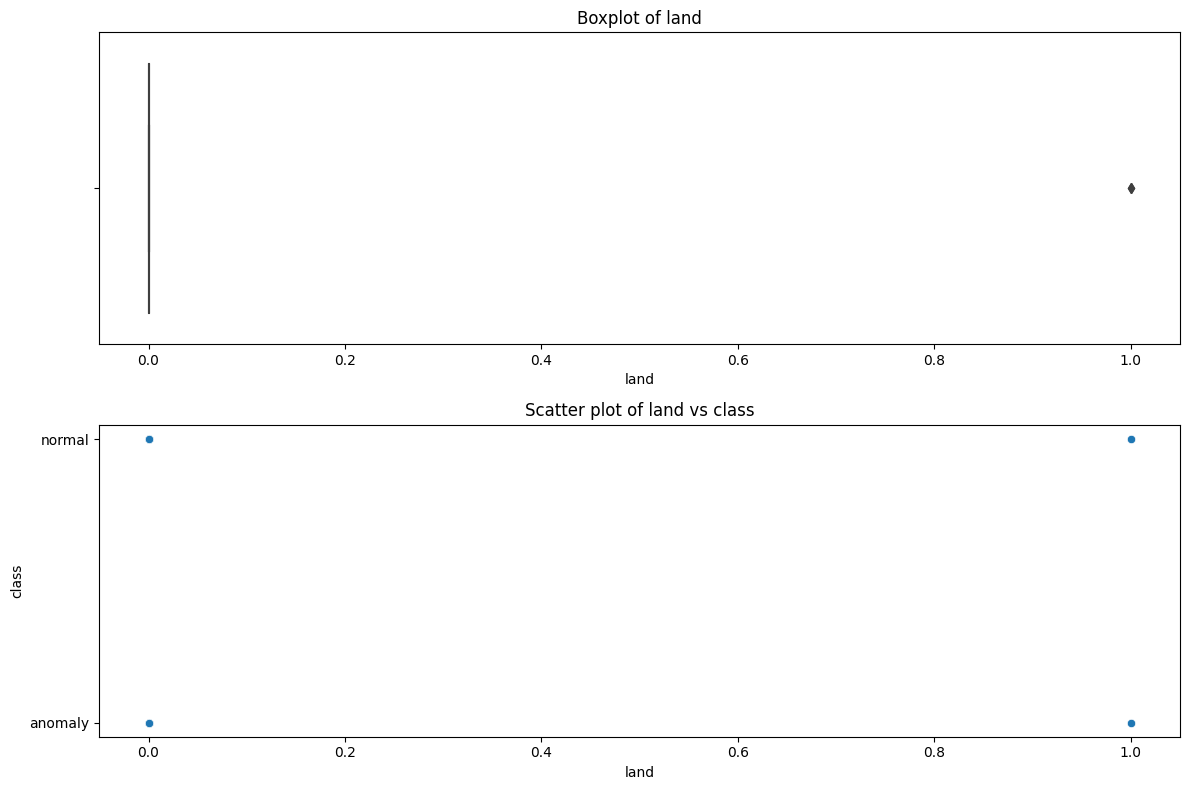

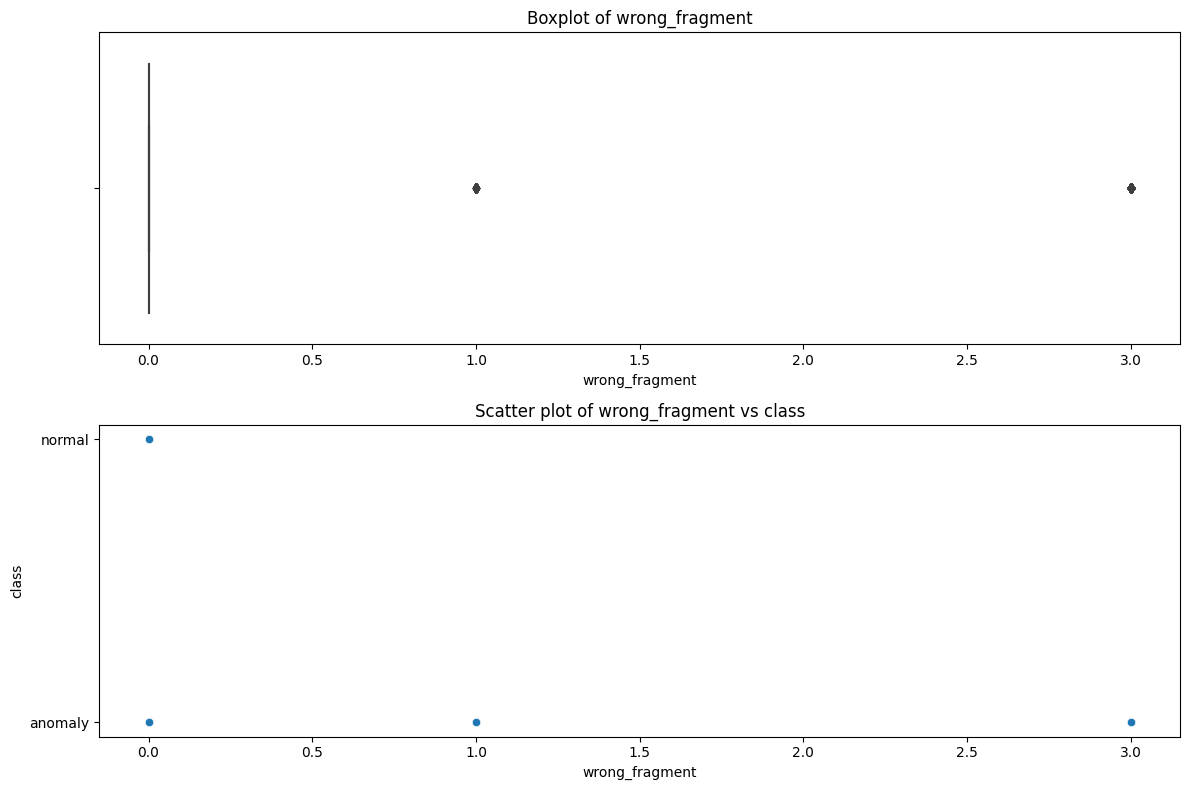

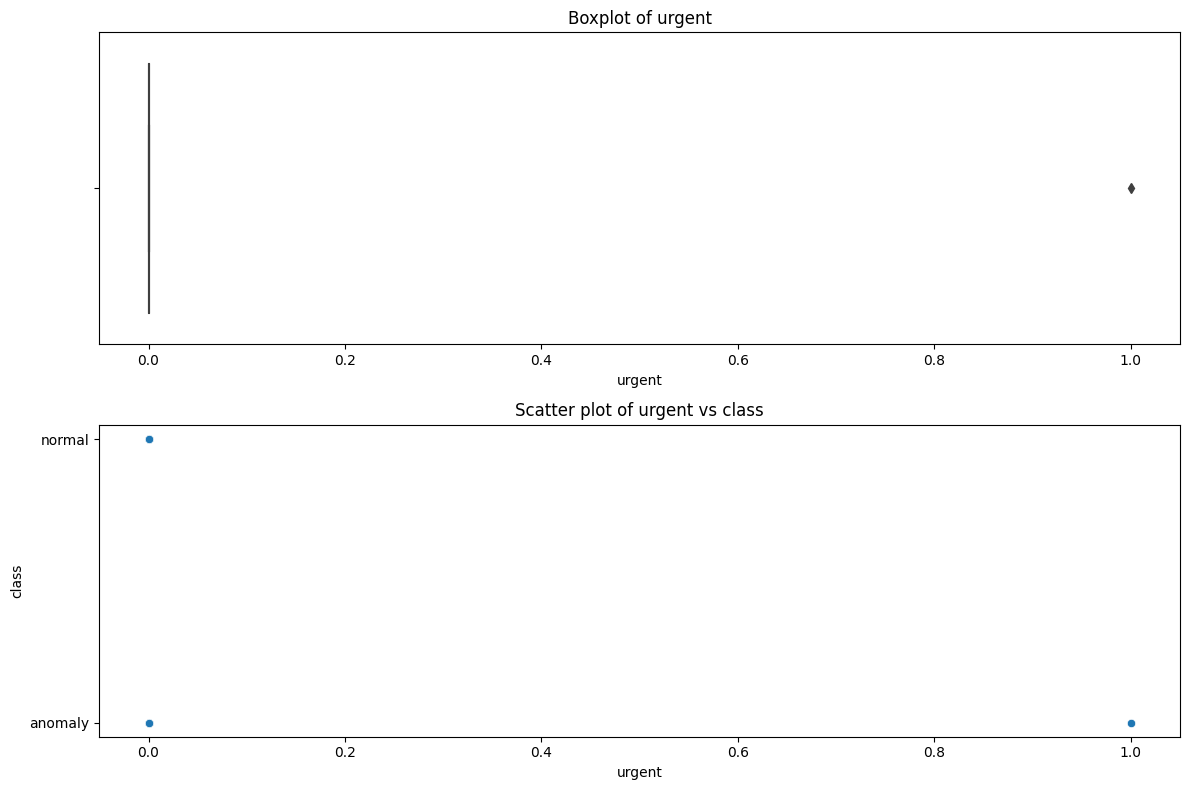

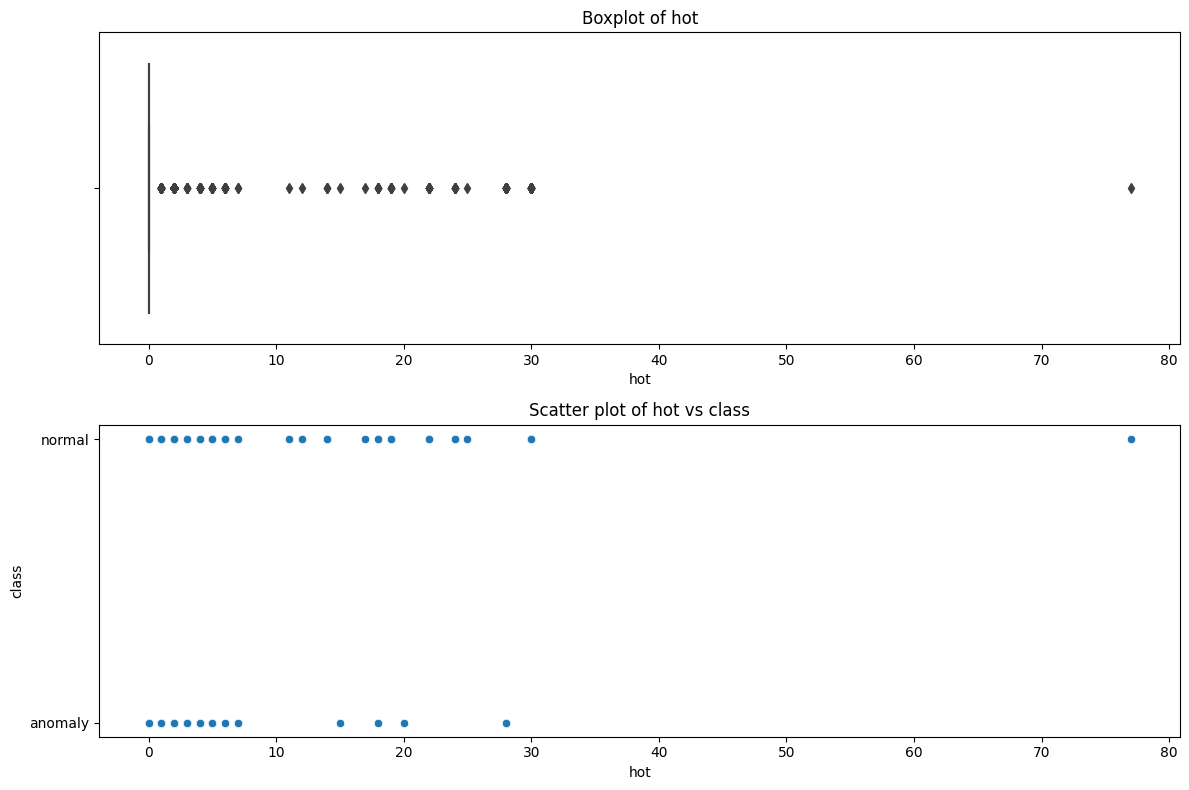

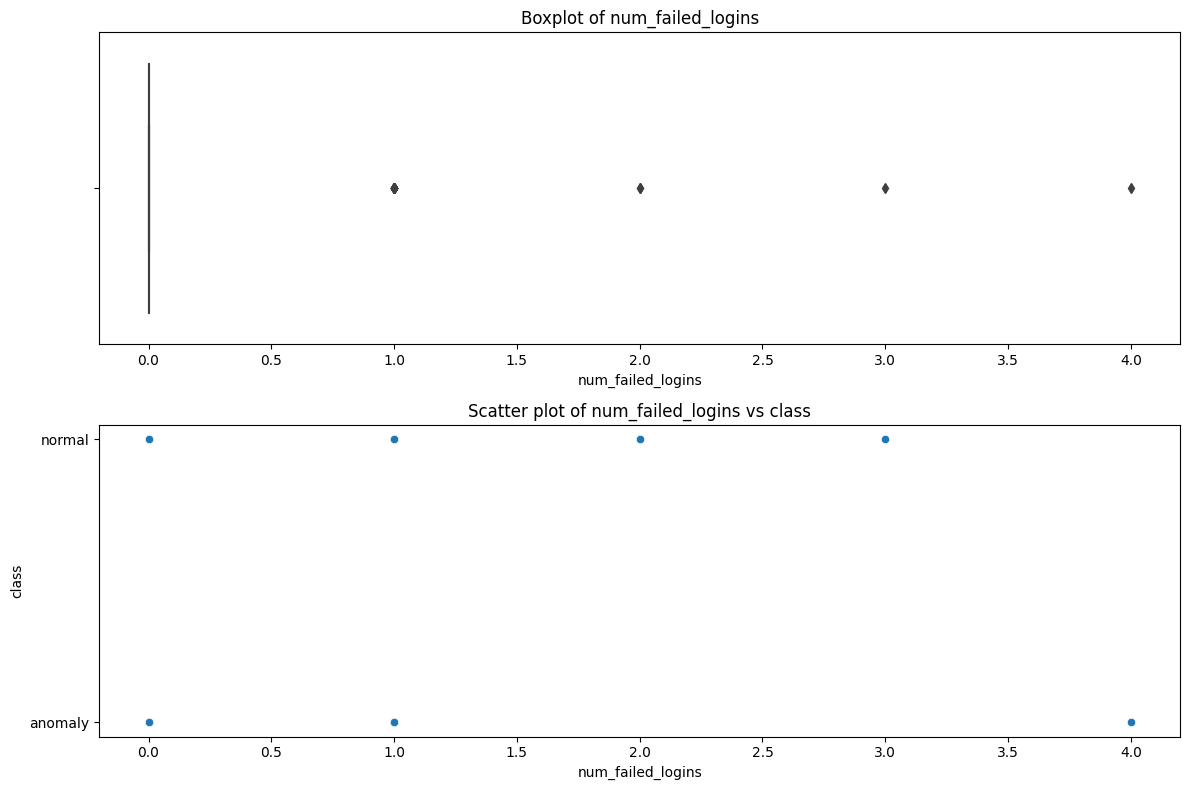

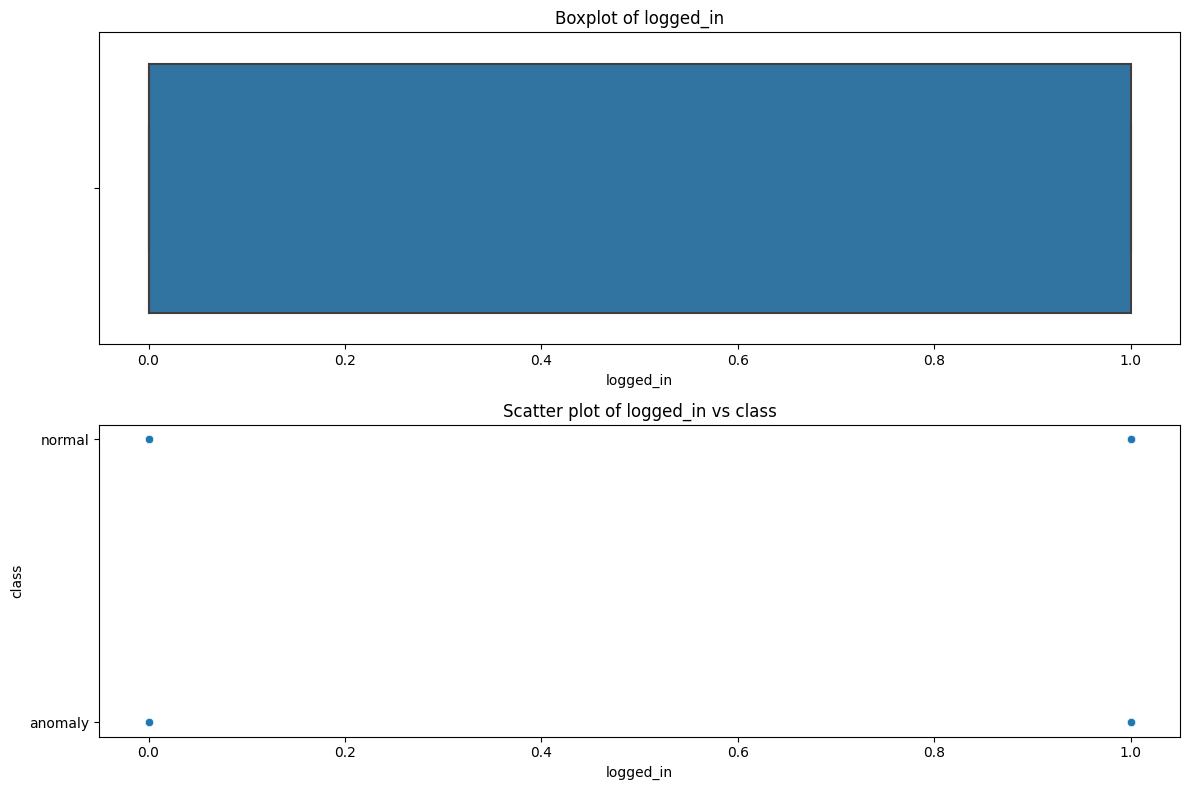

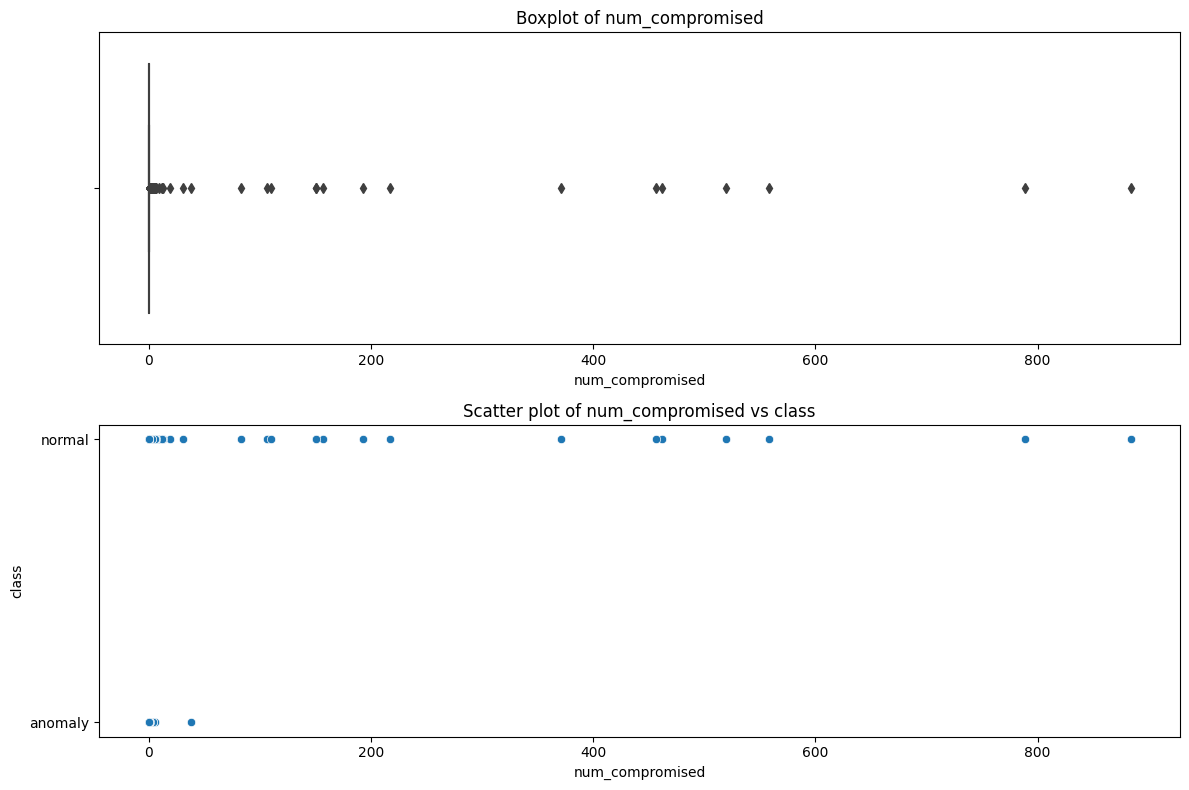

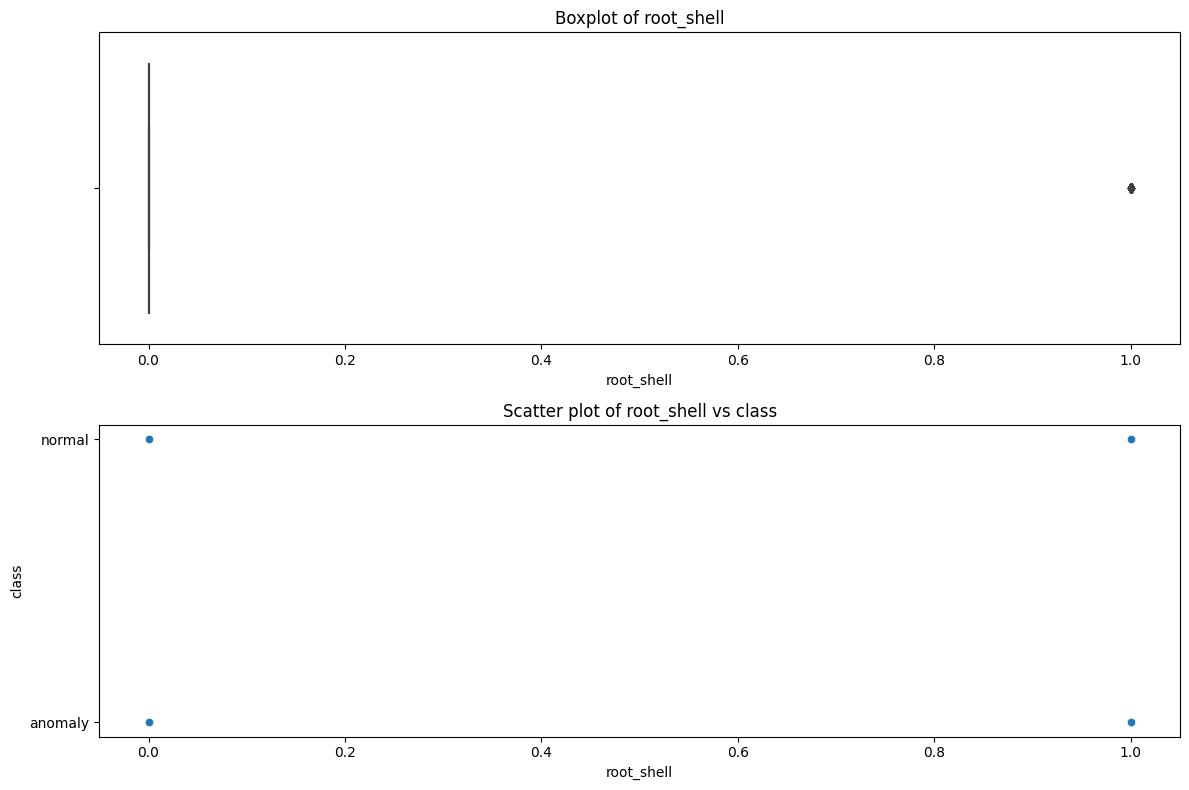

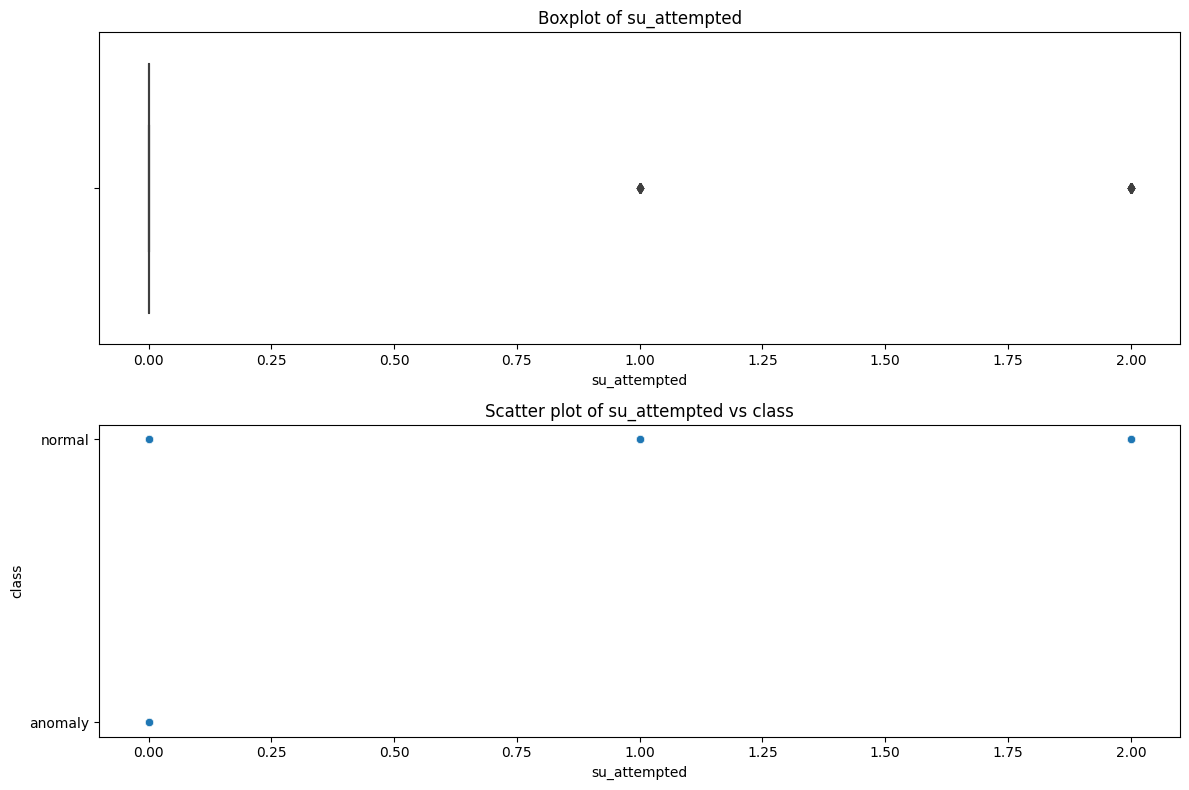

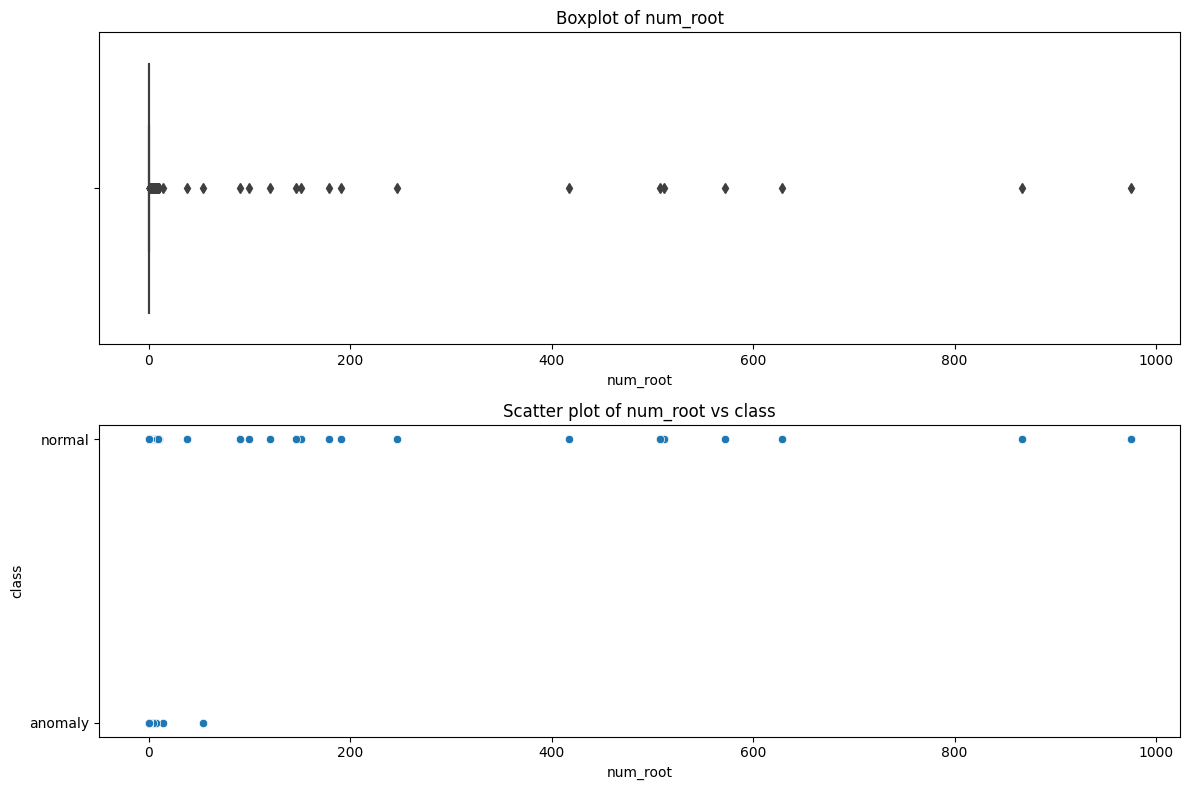

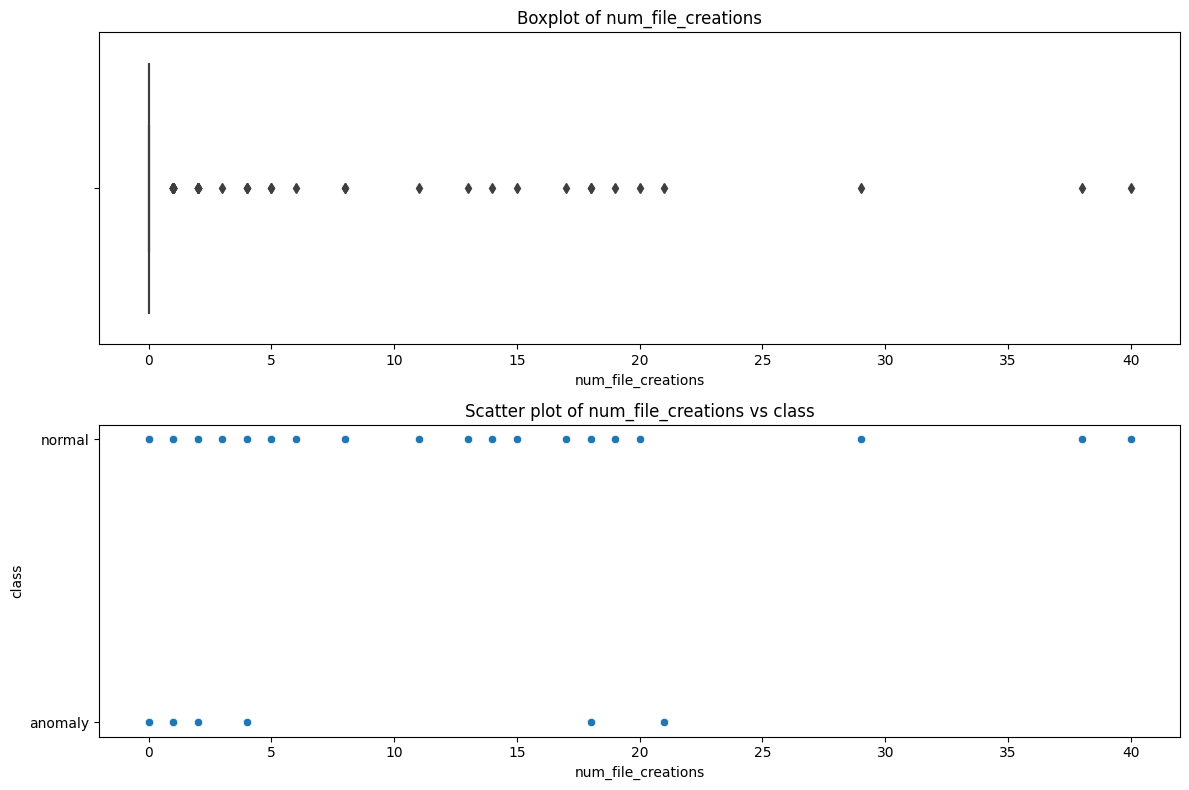

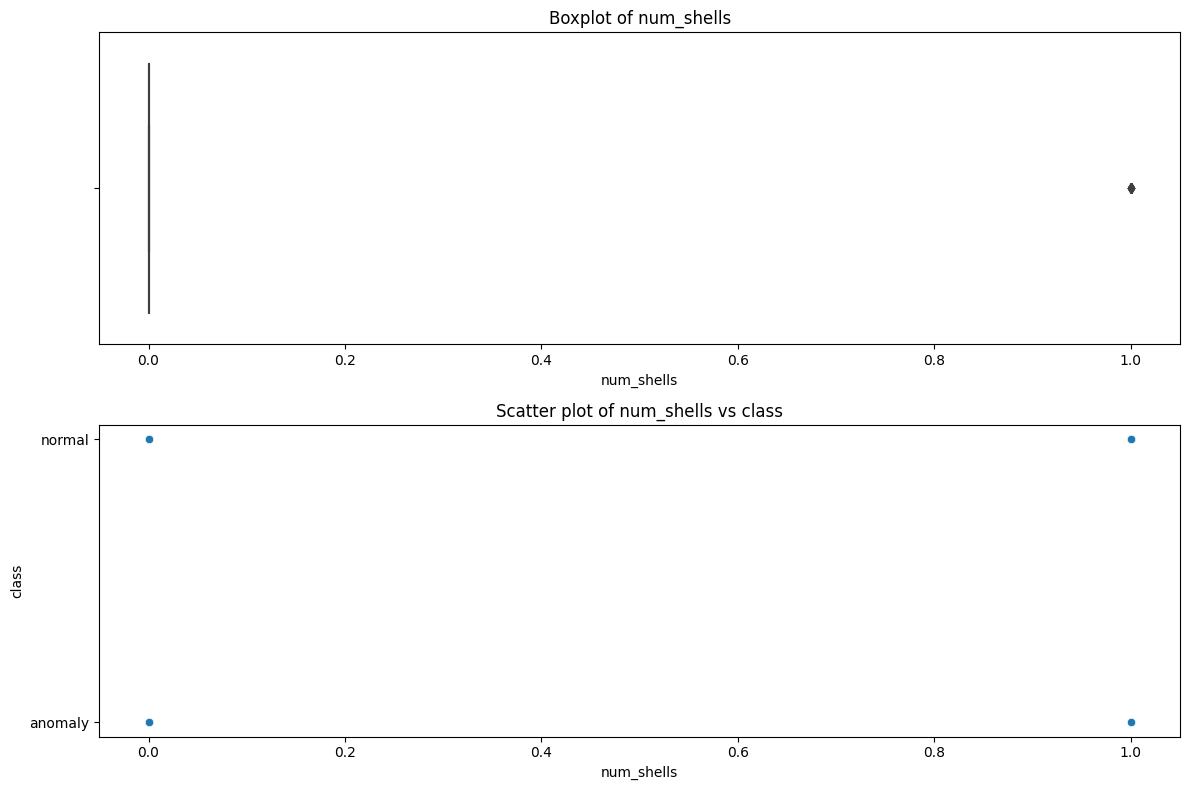

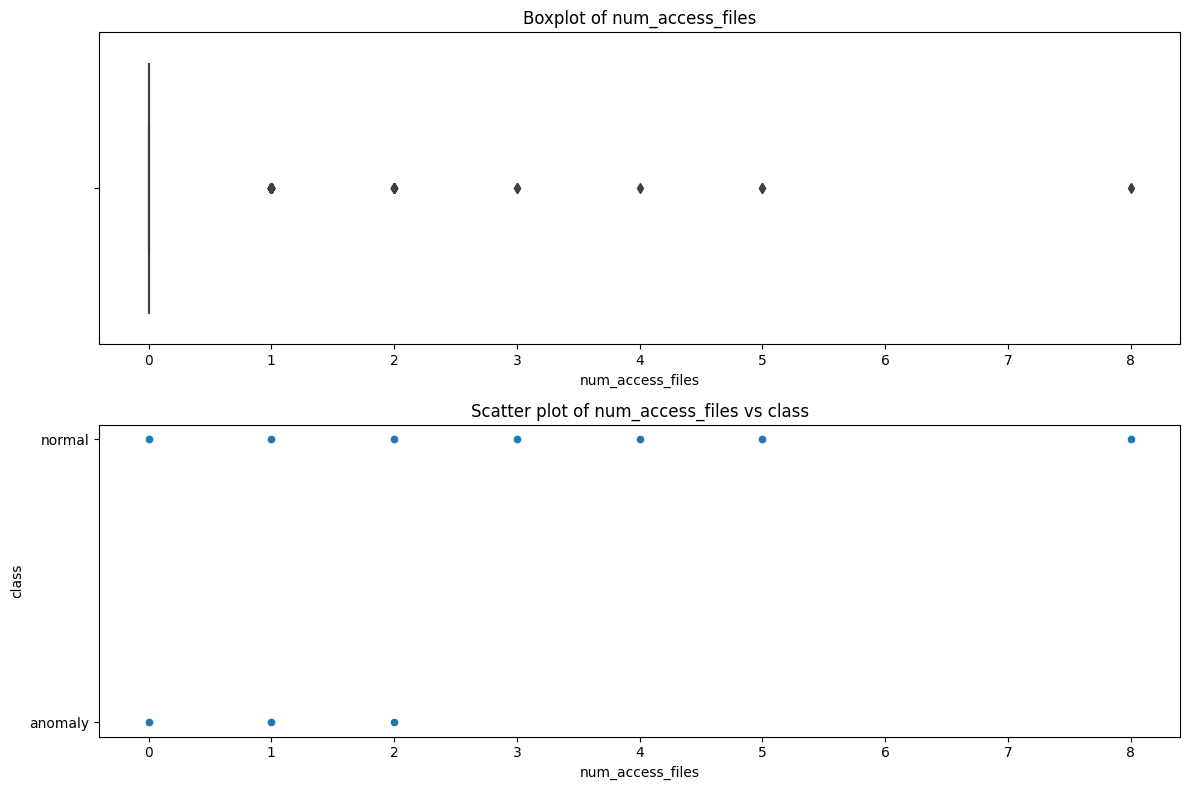

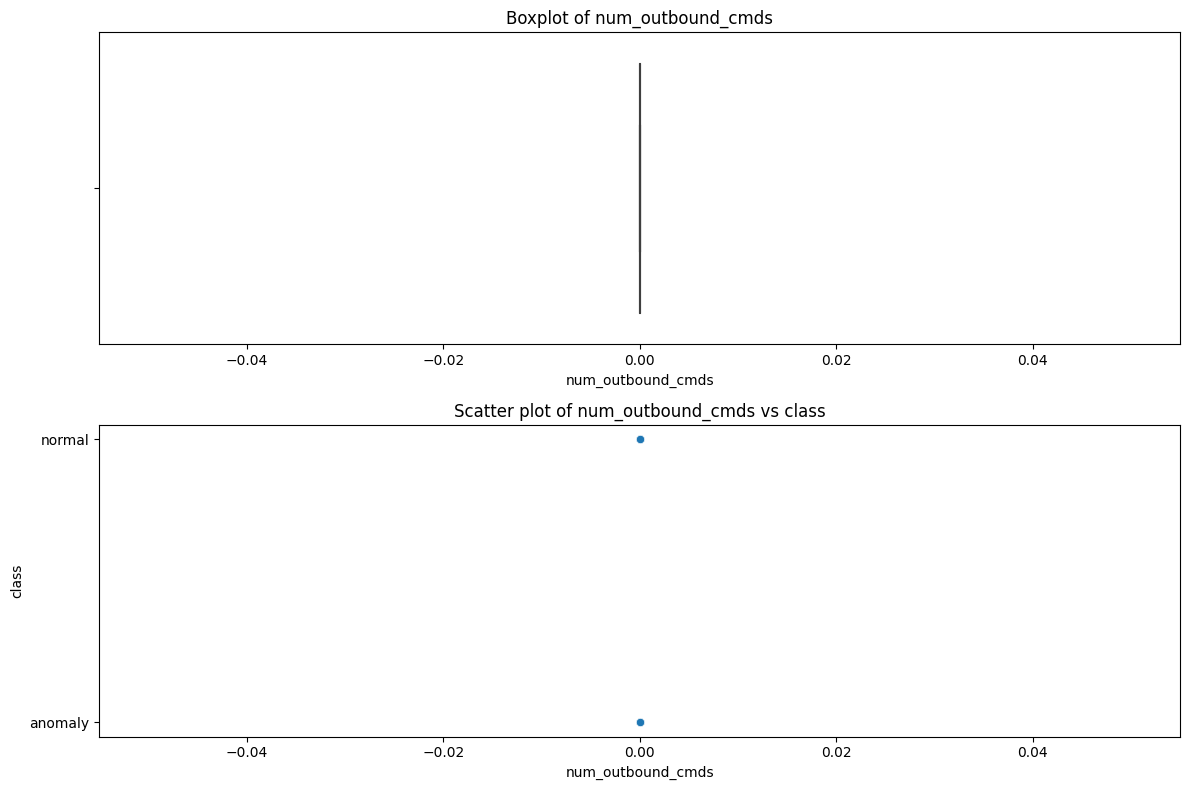

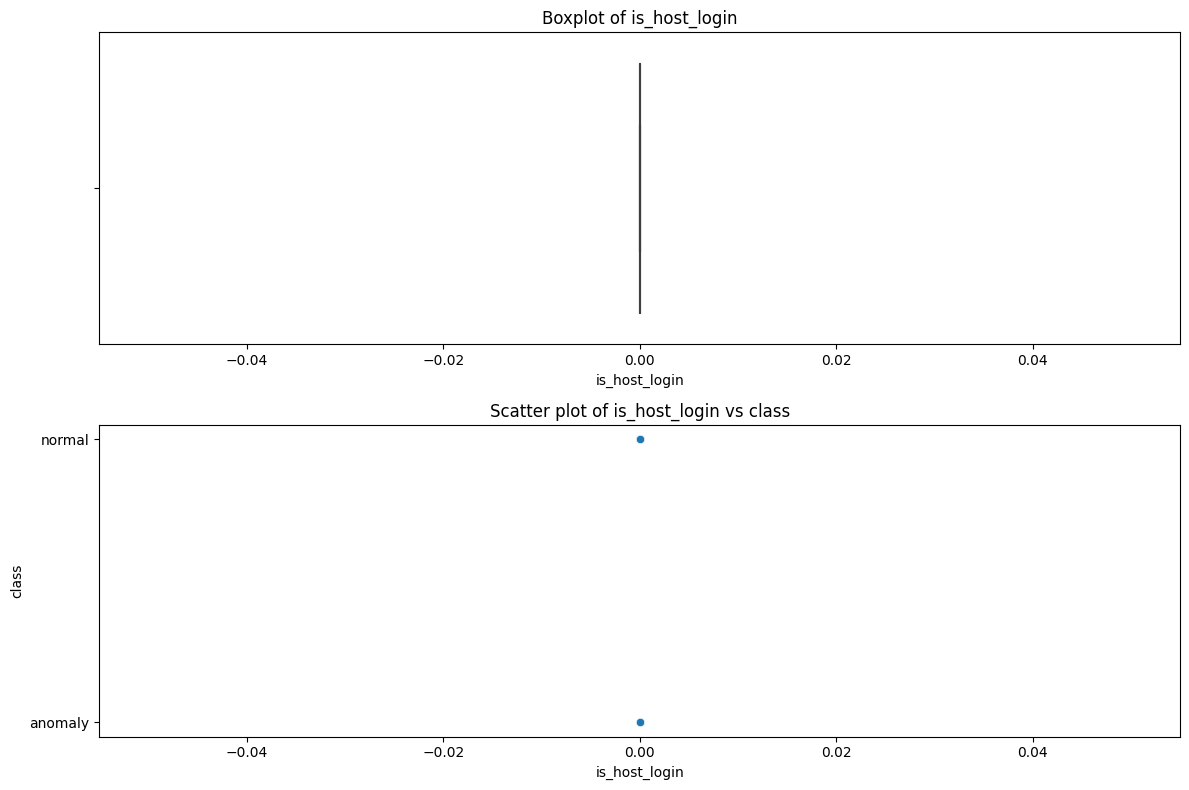

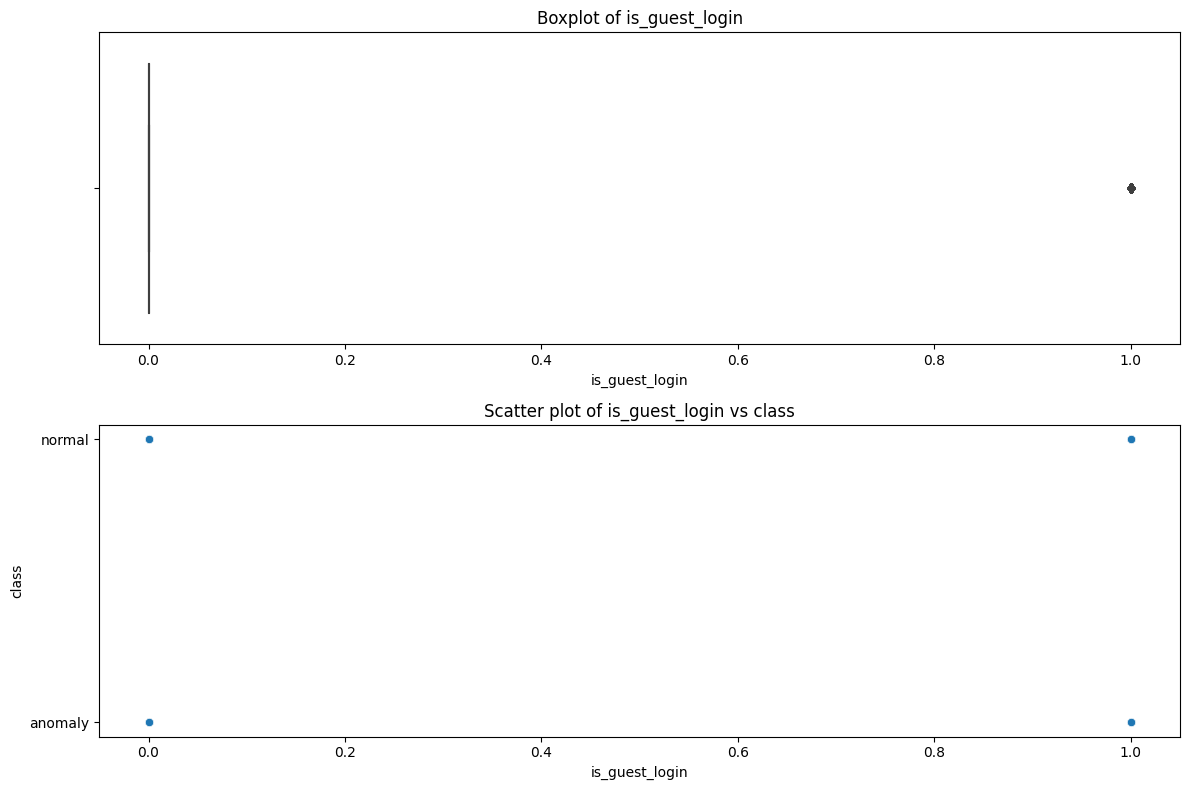

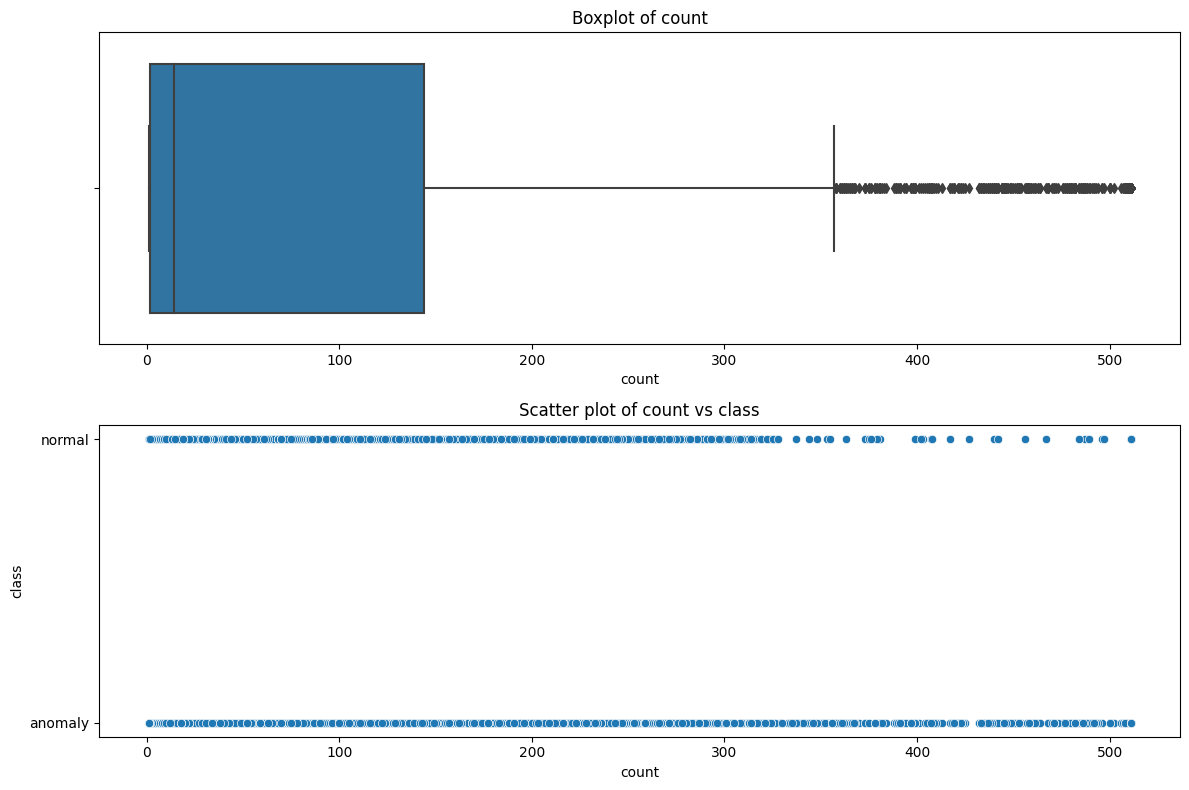

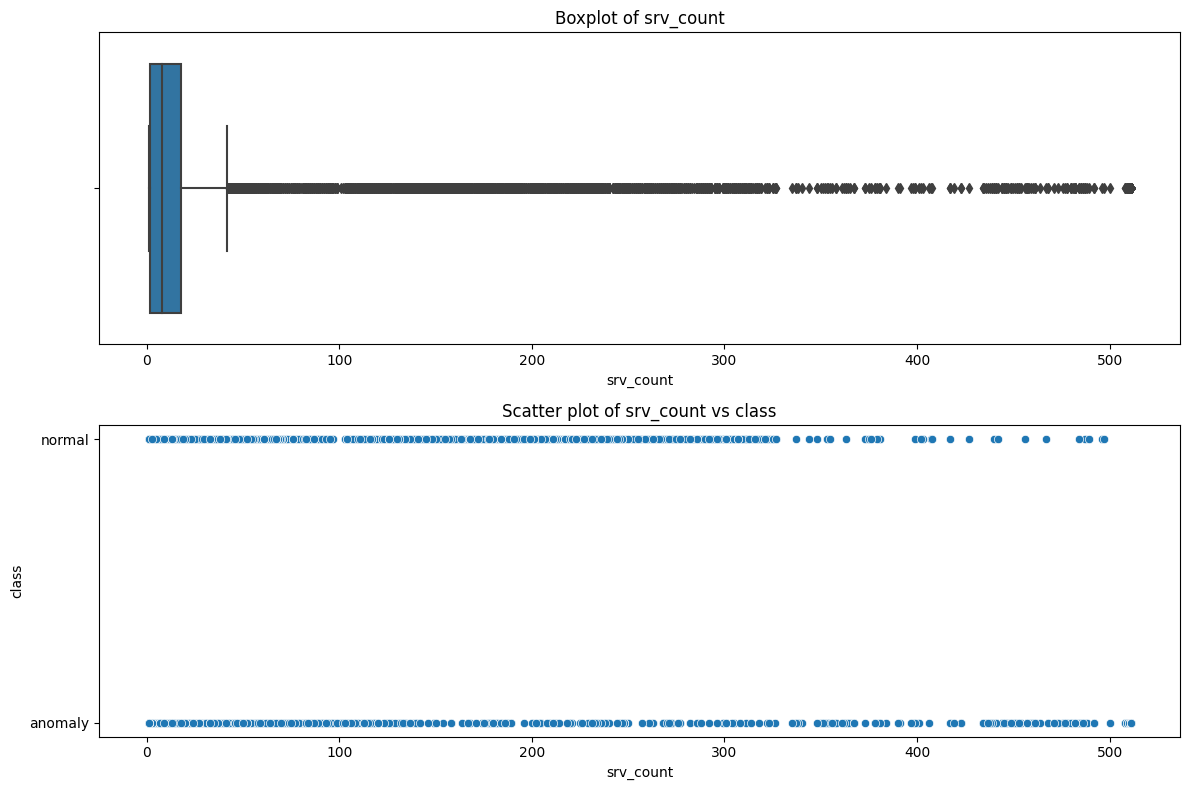

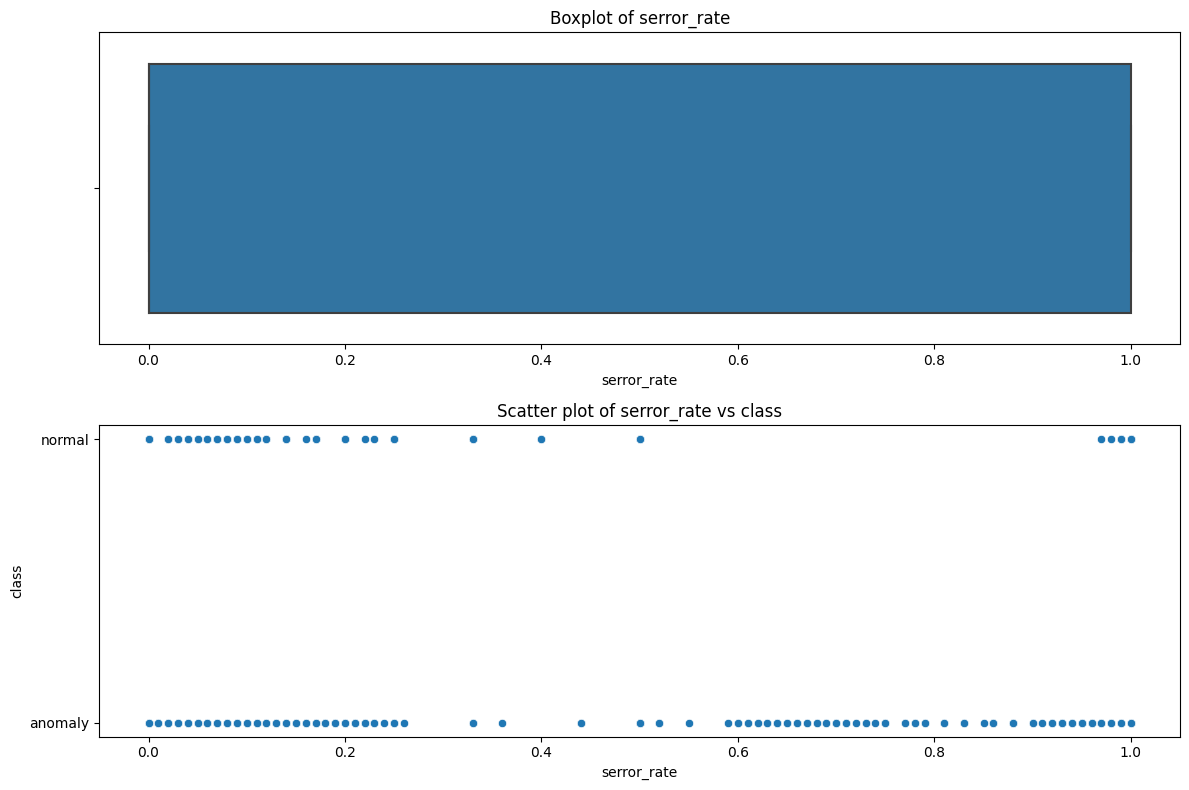

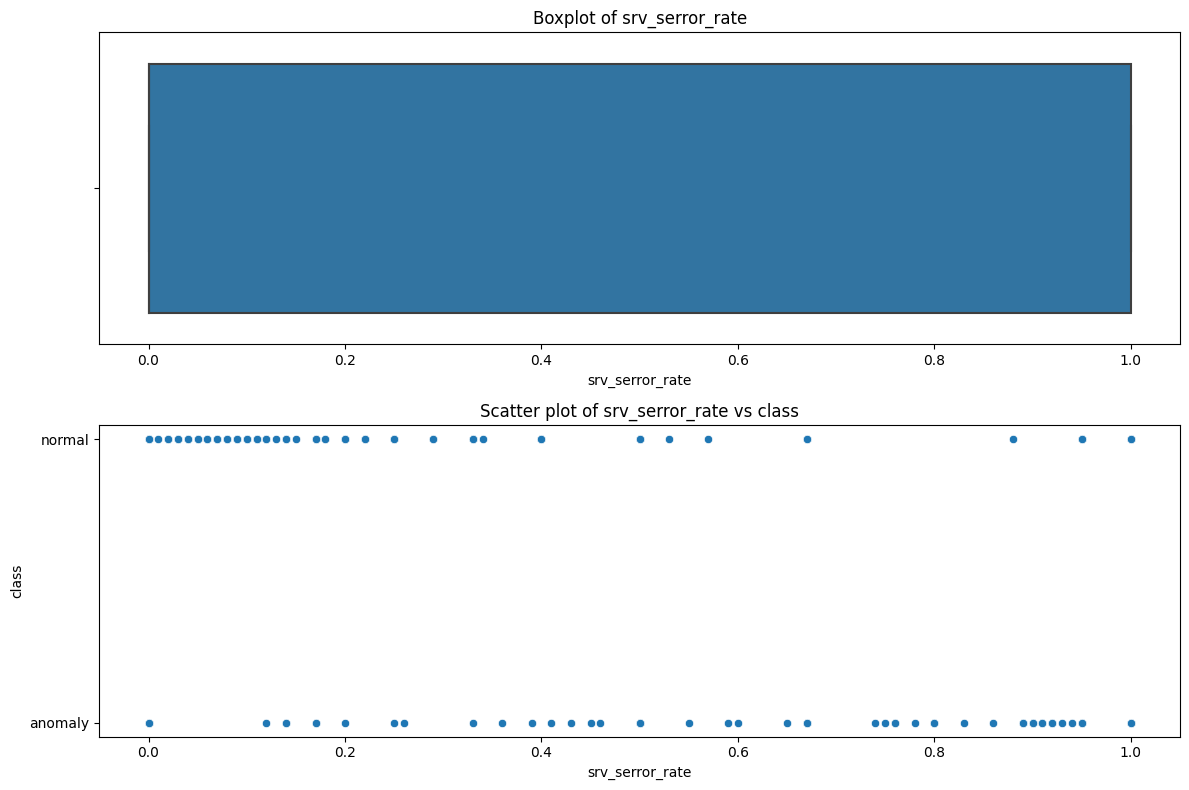

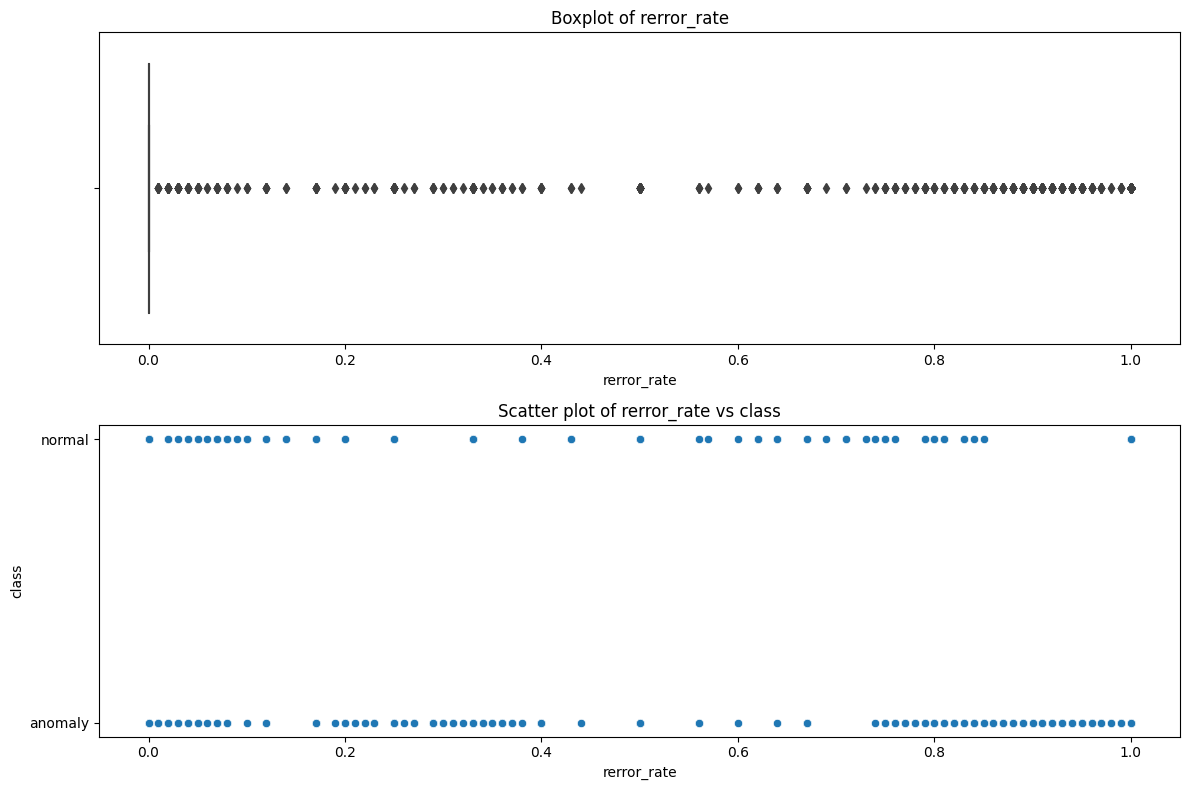

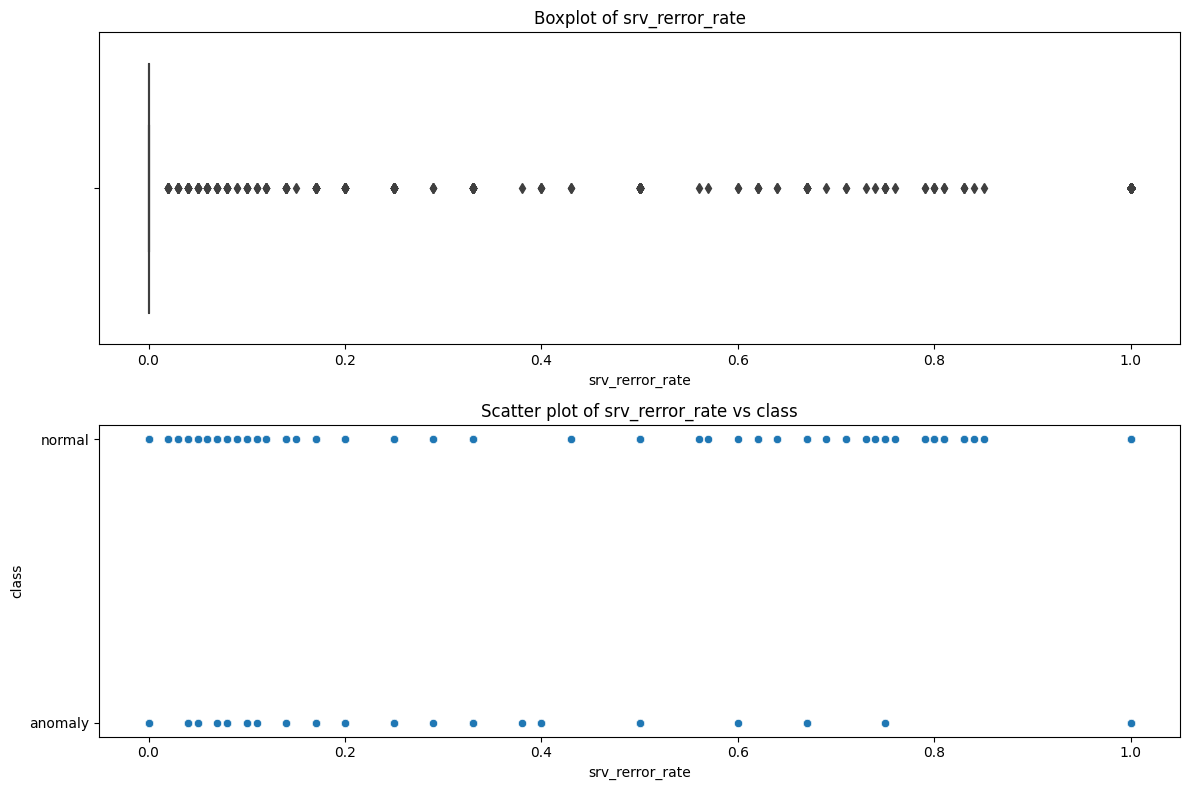

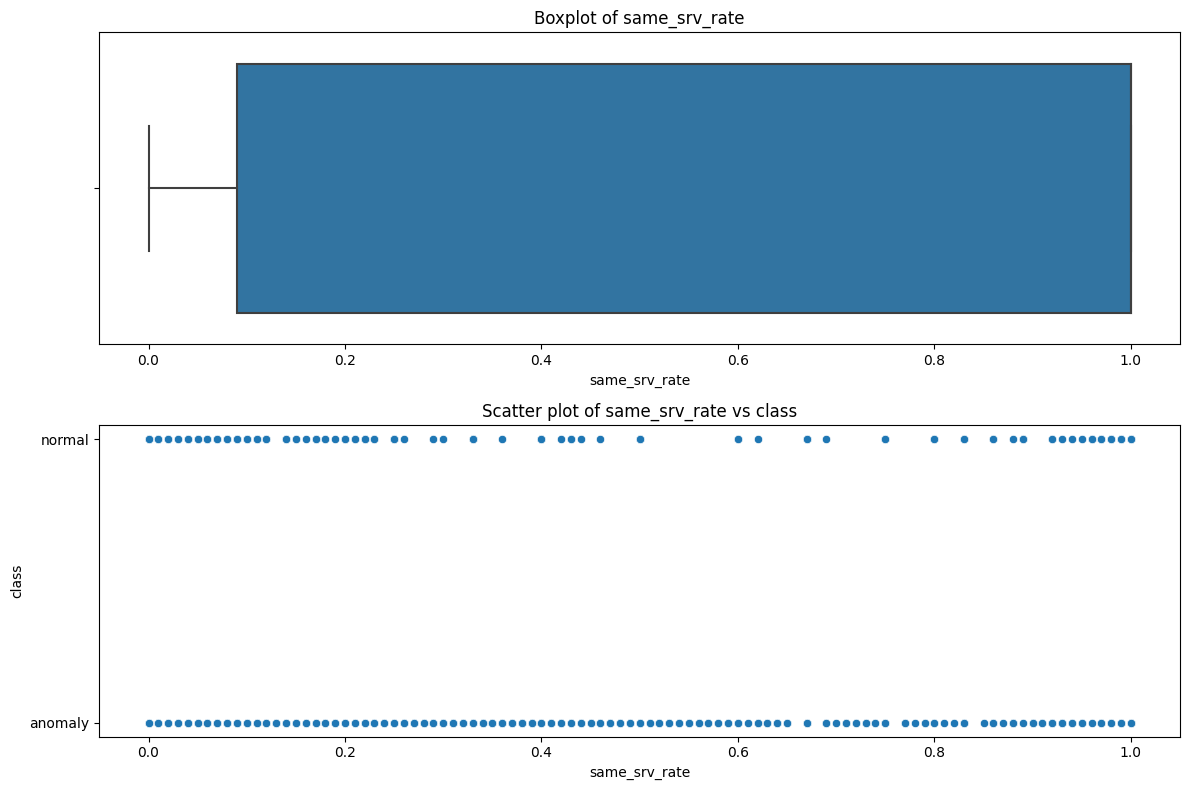

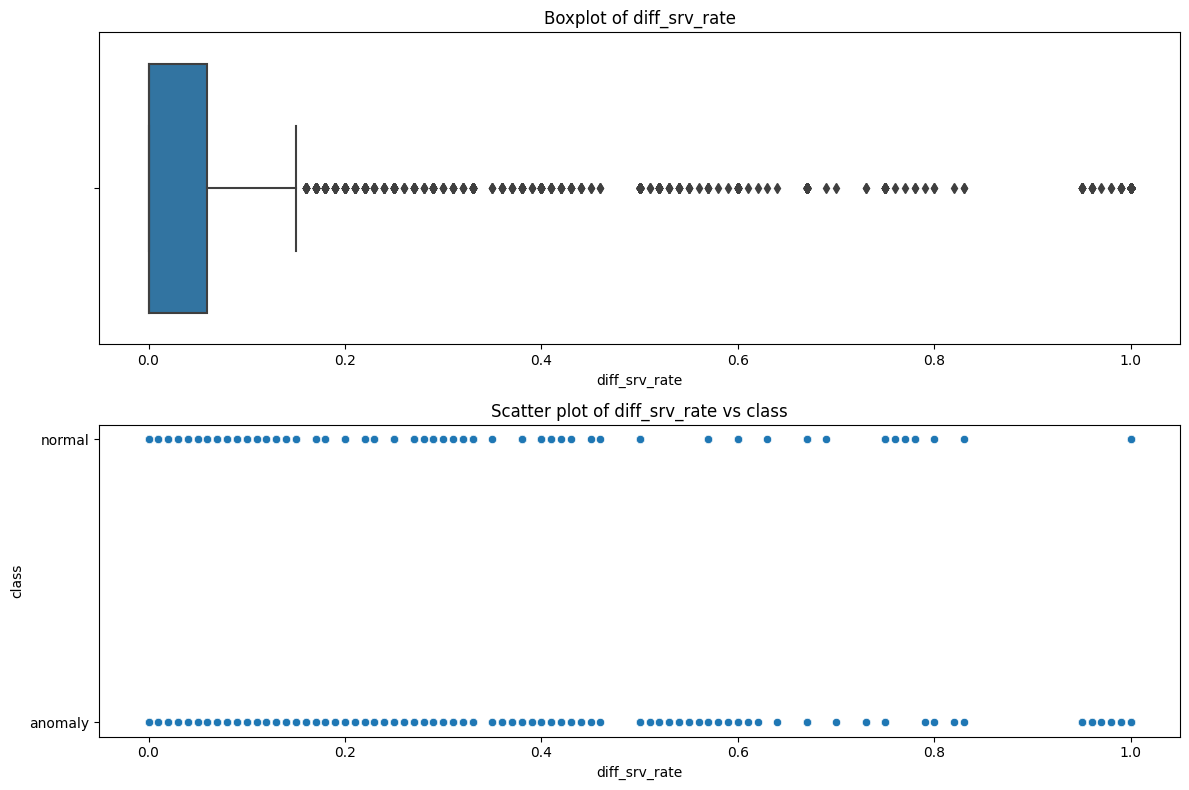

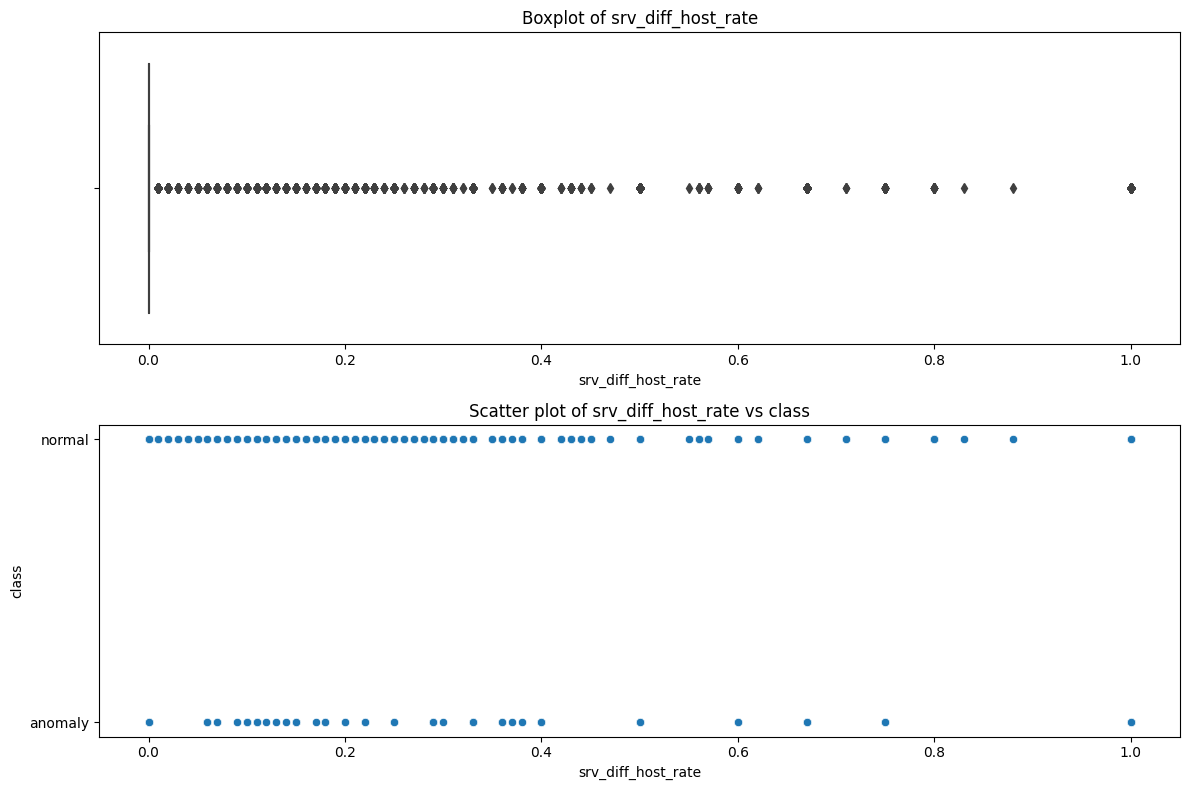

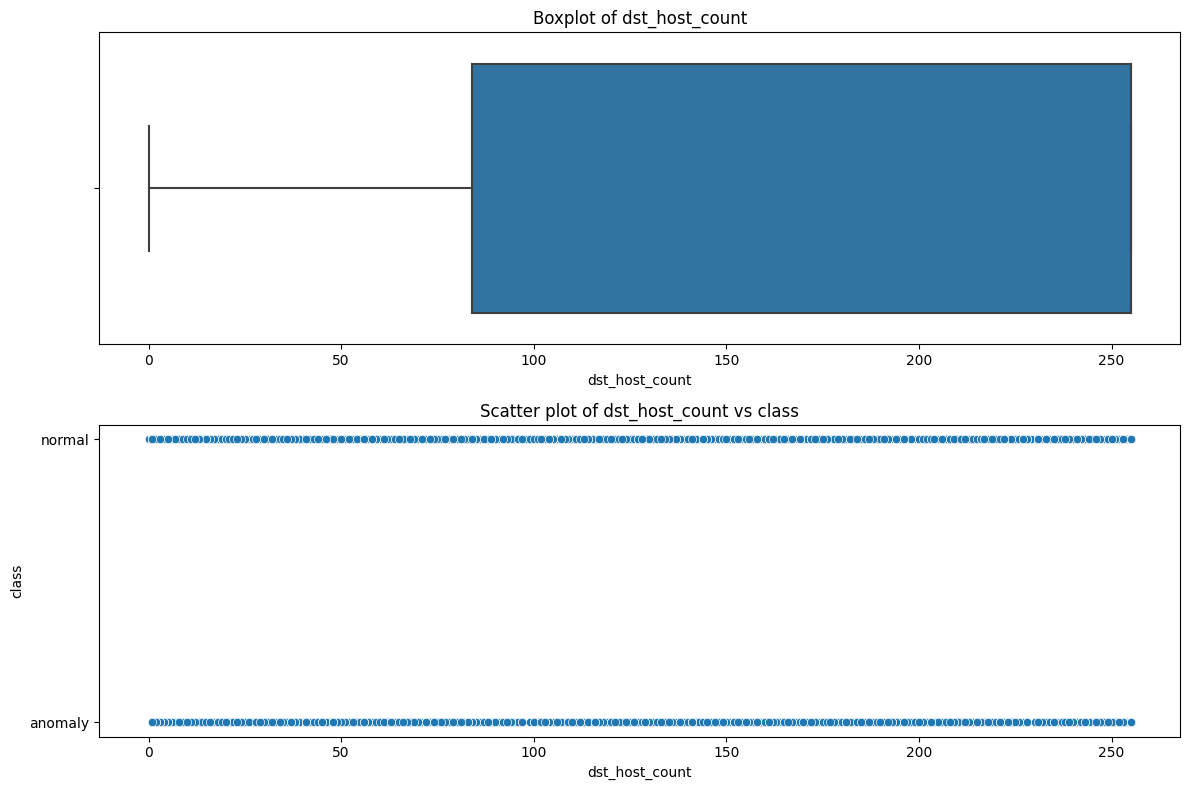

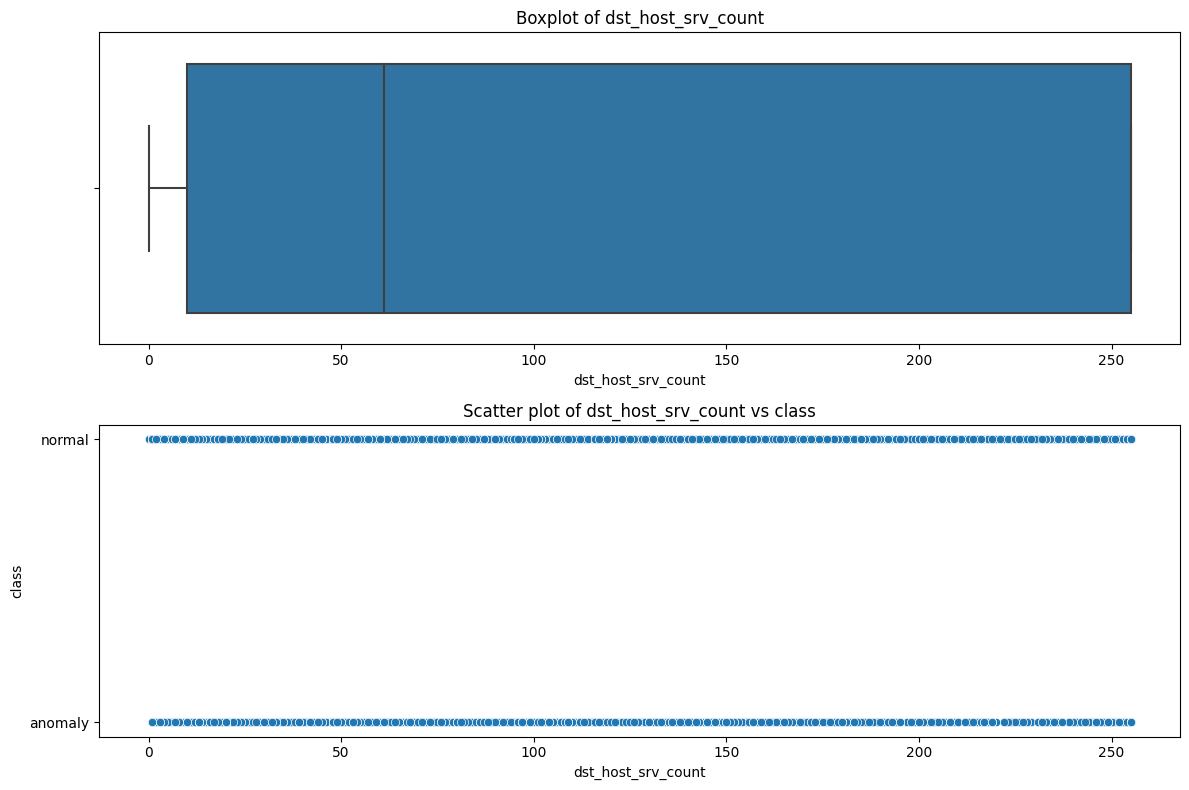

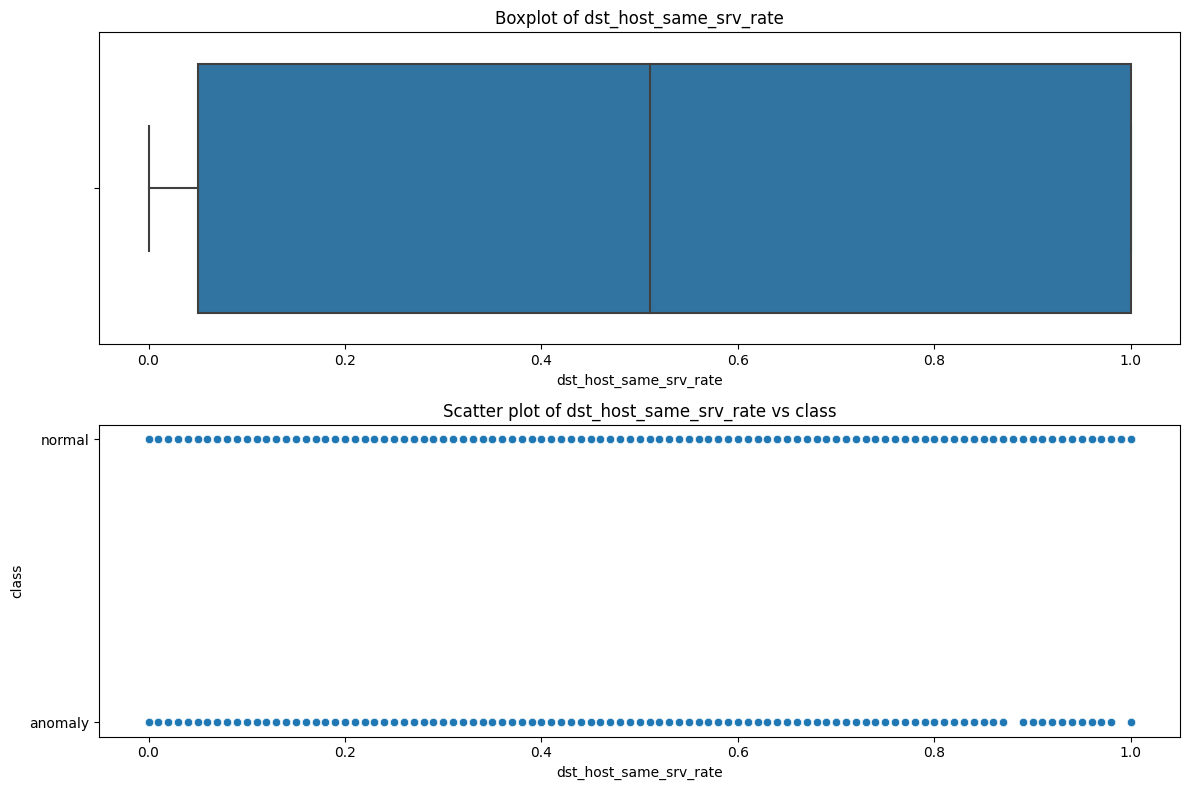

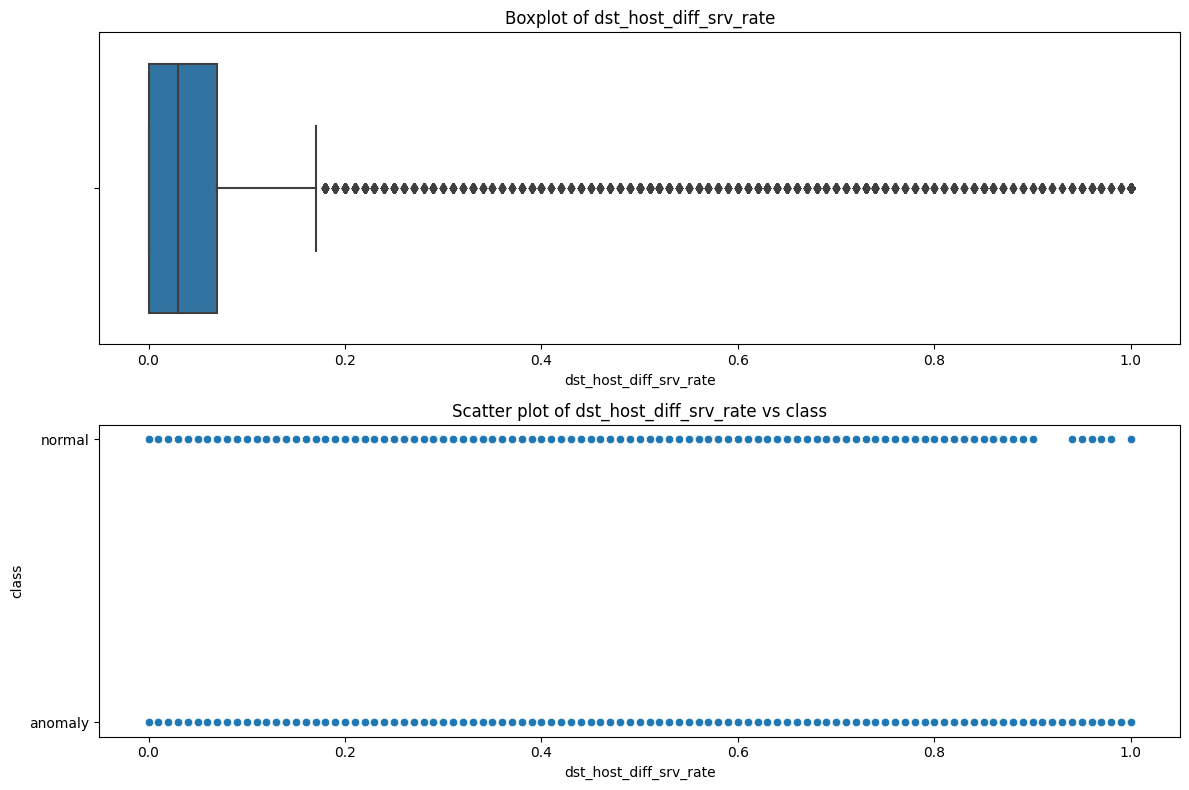

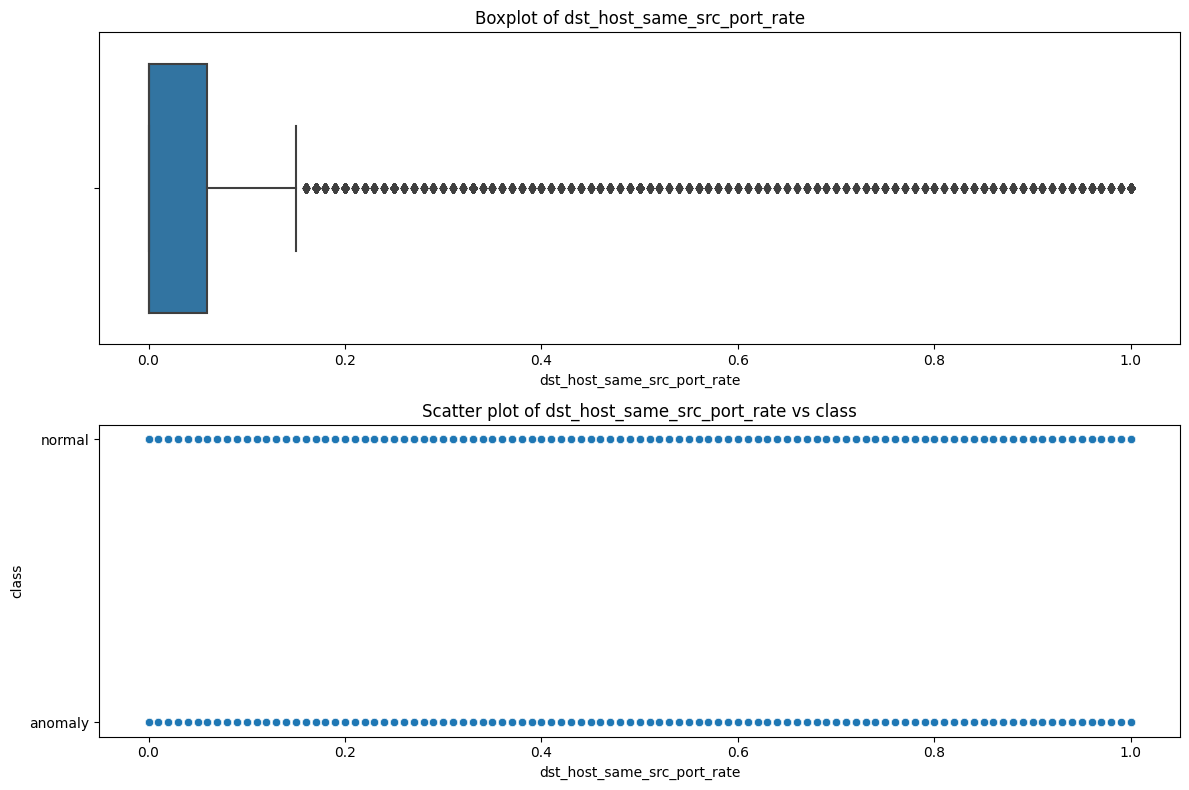

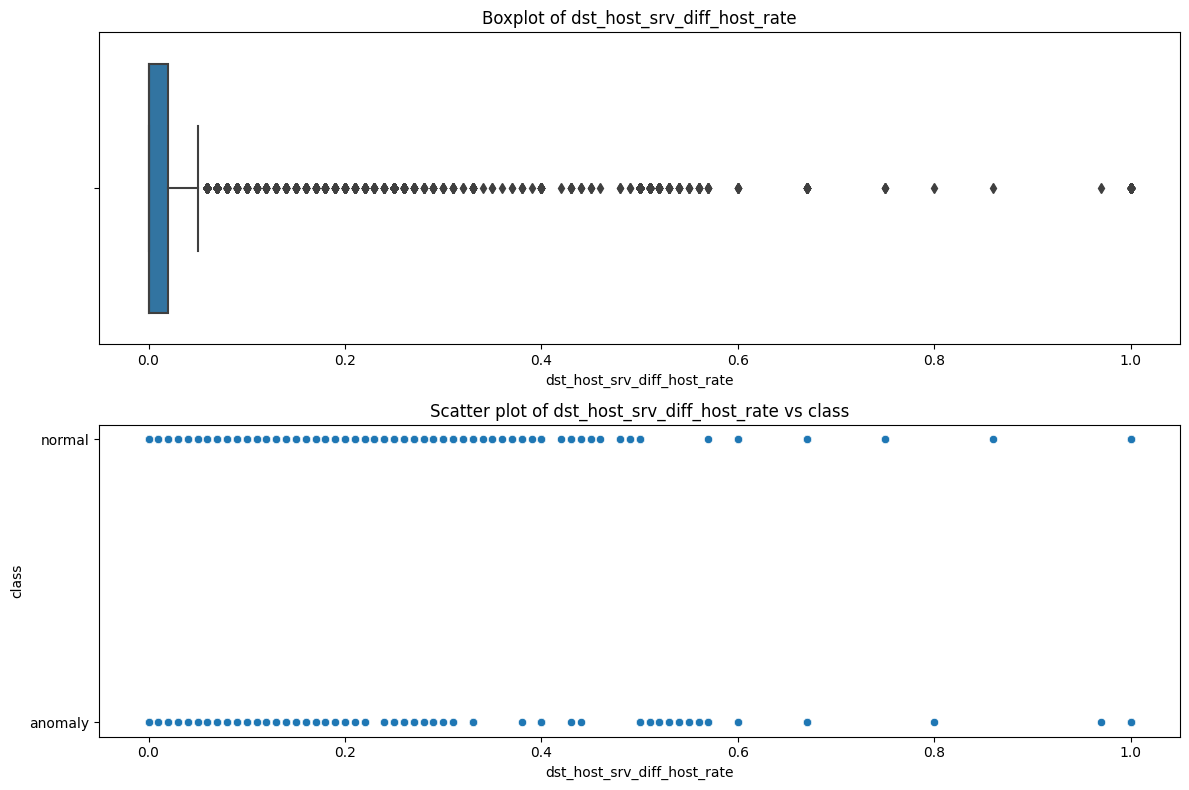

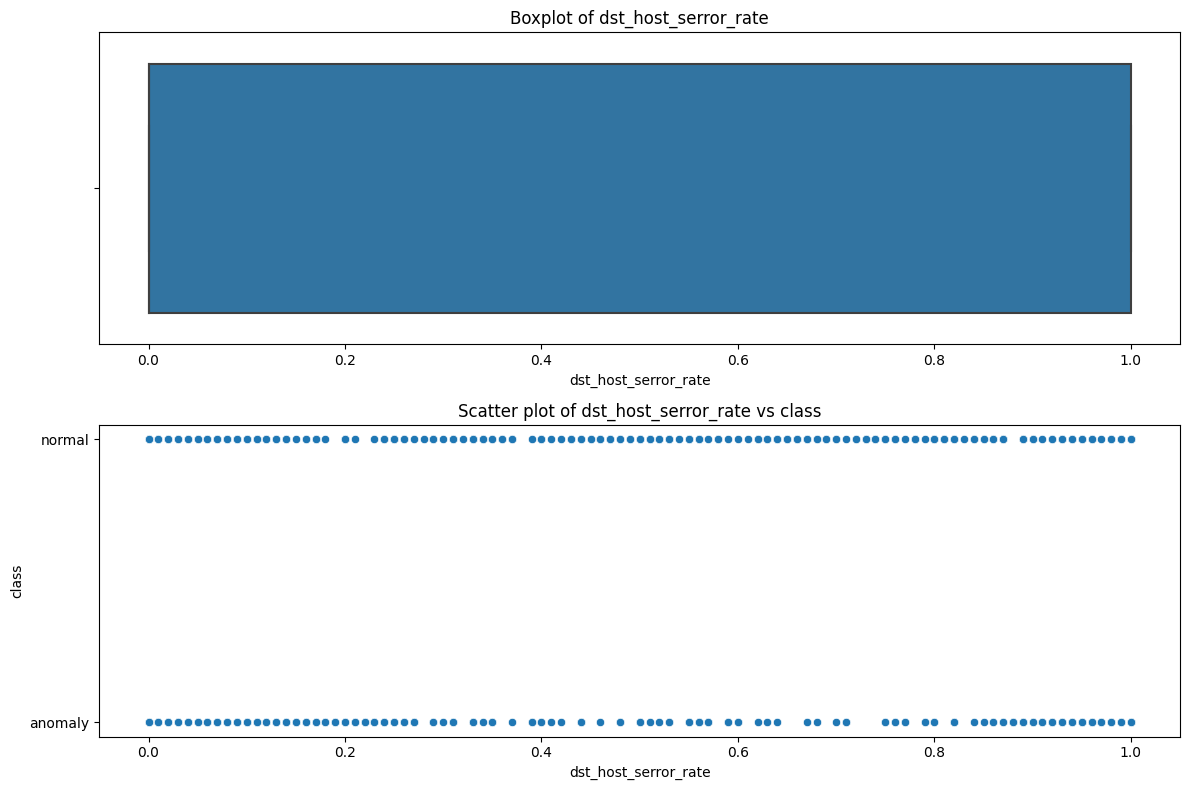

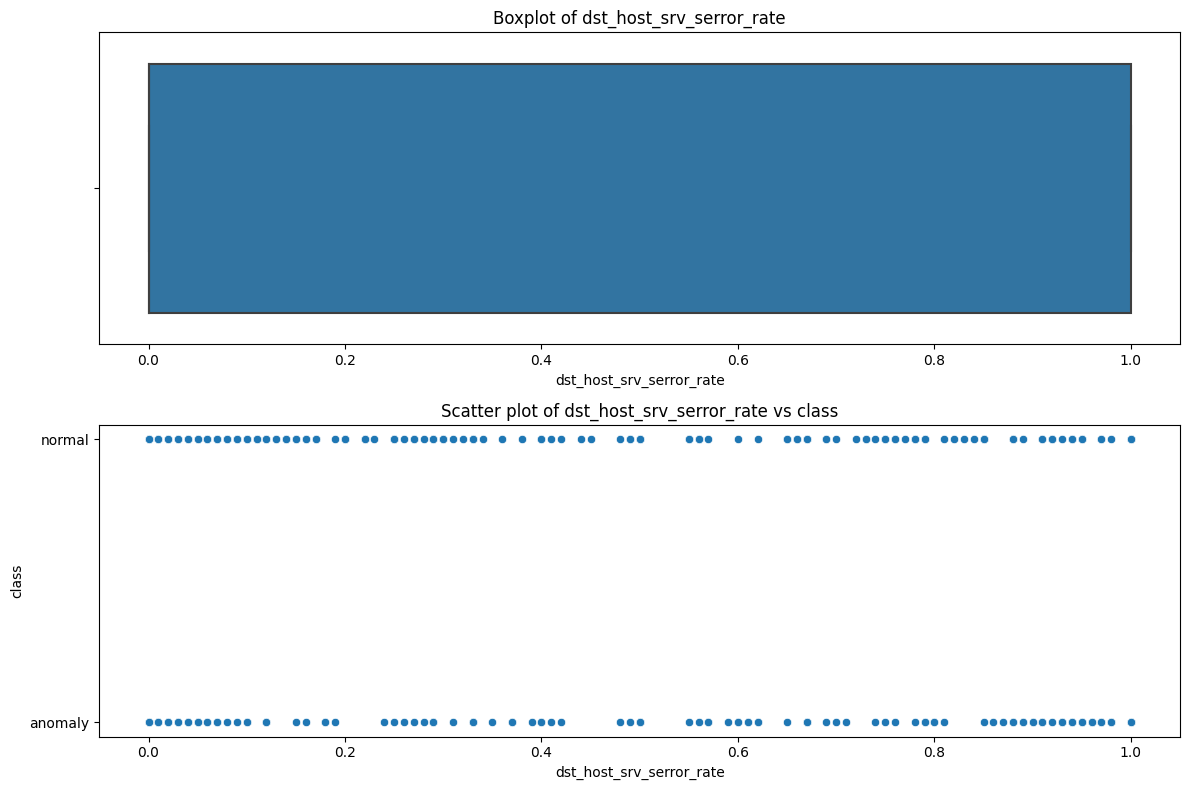

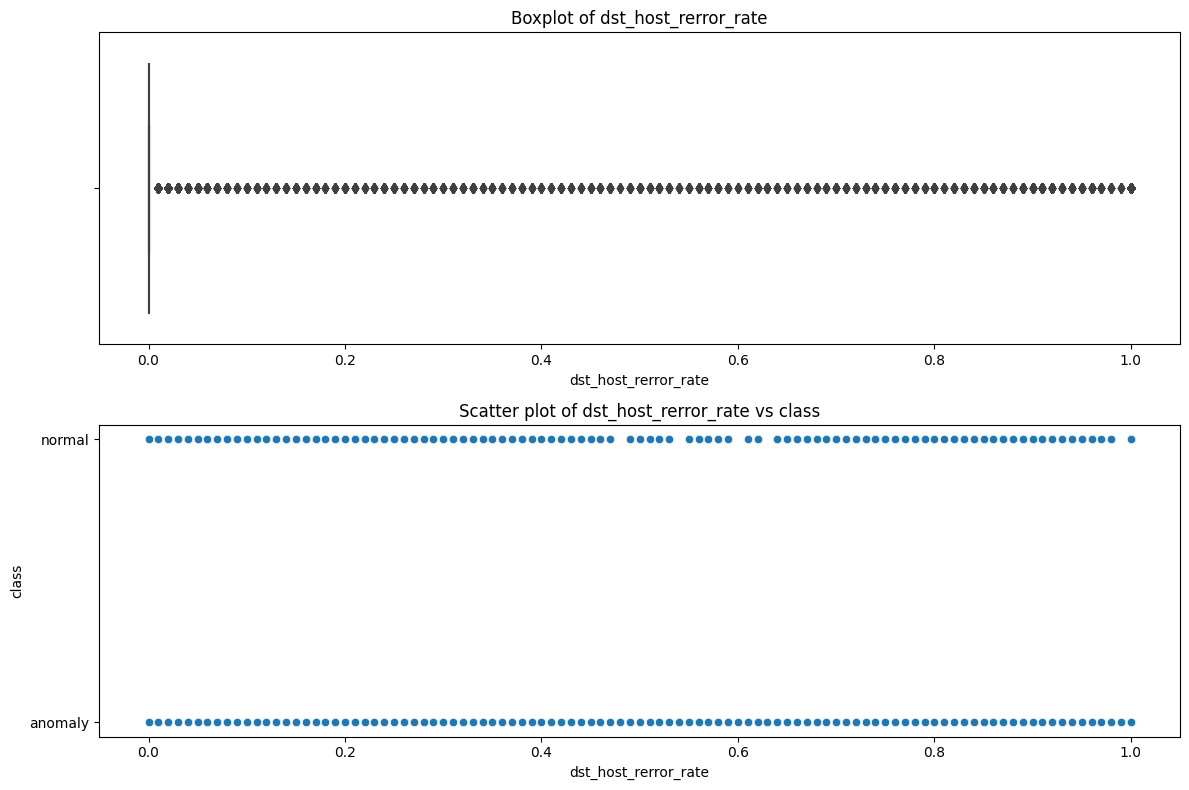

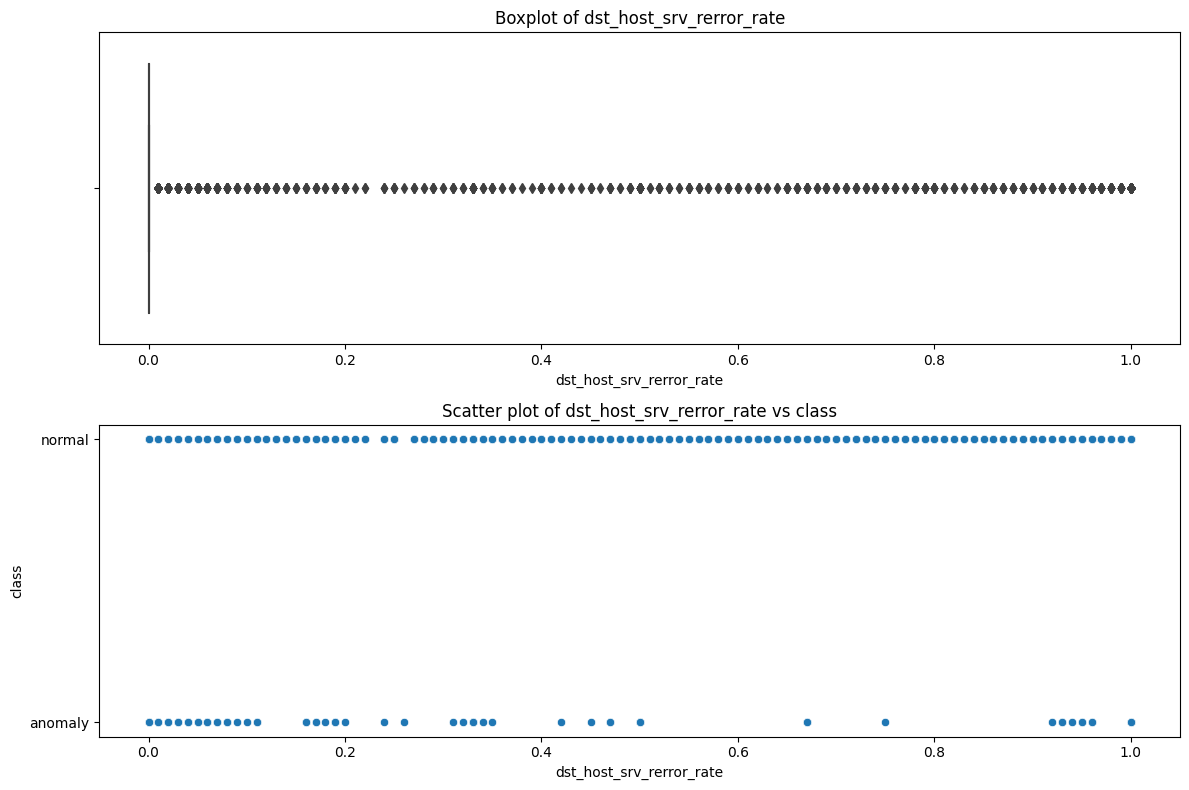

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype


for col in train.columns:
    if col != 'class' and is_numeric_dtype(train[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        
        # Boxplot
        sns.boxplot(x=train[col], ax=ax[0])
        ax[0].set_title(f'Boxplot of {col}')
        
        # Scatter plot
        sns.scatterplot(data=train, x=col, y='class', ax=ax[1])
        ax[1].set_title(f'Scatter plot of {col} vs class')
        
        plt.tight_layout()
        plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# train is our original DataFrame
# Creating a new DataFrame containing only numeric columns
numeric_train = train.select_dtypes(include=[float, int])

# Displaying the columns that are numeric
print("Numeric columns:", numeric_train.columns)

# Creating the heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(numeric_train.corr(), annot=True)
plt.show()


Numeric columns: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


<Axes: xlabel='class', ylabel='count'>

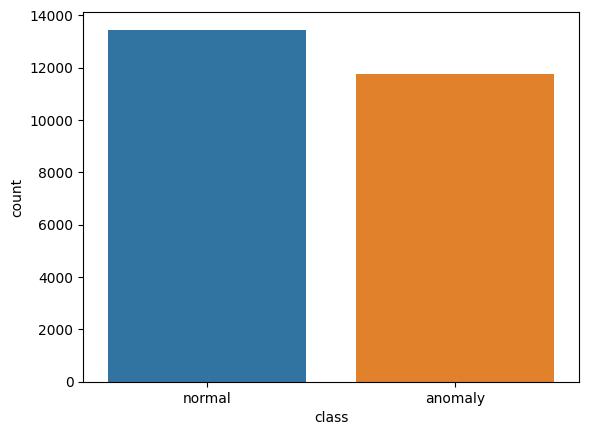

In [63]:
sns.countplot(x=train['class'])

**LABEL ENCODING**

In [64]:
from sklearn.preprocessing import LabelEncoder

encoding_dict = {
    "protocol_type": LabelEncoder(),
    "service": LabelEncoder(),
    "flag": LabelEncoder()
}

def le(df):
    for col, encoder in encoding_dict.items():
        if col in df.columns and df[col].dtype == 'object':
            df[col] = encoder.fit_transform(df[col])

# Applying label encoding to train and test data
le(train)
le(test)


In [65]:
joblib.dump(encoding_dict, 'encoders.joblib')

['encoders.joblib']

In [66]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# FEATURE SELECTION

In [67]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [68]:
# Feature selection using Recursive Feature Elimination (RFE) with a Random Forest Classifier.
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [69]:
X_train = X_train[selected_features]

# SPLIT AND SCALE DATA

In [70]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# K Nearest Neighbors (KNN) classification model

In [72]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [73]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9812119608362001], datetime_start=datetime.datetime(2024, 8, 24, 14, 28, 56, 731572), datetime_complete=datetime.datetime(2024, 8, 24, 14, 28, 57, 783056), params={'KNN_n_neighbors': 13}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [74]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9809458999659748
Test Score: 0.9812119608362001


# Logistic Regression Model

In [75]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [76]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9287739593966202
Test Score: 0.9231278115903678


# Decision Tree Classifier

In [77]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


In [78]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.9958983858163535], datetime_start=datetime.datetime(2024, 8, 24, 14, 32, 5, 669490), datetime_complete=datetime.datetime(2024, 8, 24, 14, 32, 5, 760981), params={'dt_max_depth': 19, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=13, value=None)


In [79]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9956337655464409


In [80]:
joblib.dump(dt,"decision_tree.pkl")

['decision_tree.pkl']

In [81]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

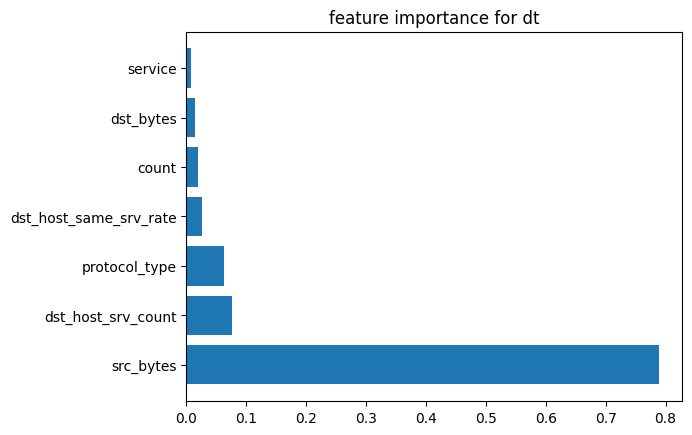

In [82]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

# Random Forest Classifier

In [83]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


In [84]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.9966922466260916], datetime_start=datetime.datetime(2024, 8, 24, 14, 36, 43, 752759), datetime_complete=datetime.datetime(2024, 8, 24, 14, 36, 44, 91138), params={'rf_max_depth': 17, 'rf_max_features': 5, 'rf_n_estimators': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=11, value=None)


In [85]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9998298741068391
Test Score: 0.9962953162212226


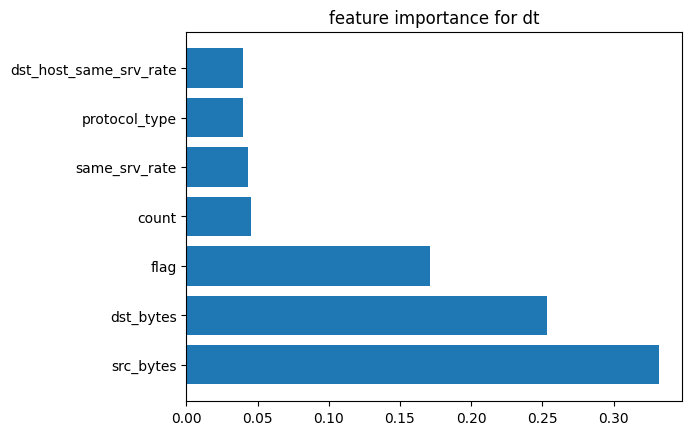

In [86]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

# SKLearn Gradient Boosting Model

In [87]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [88]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9947828059430646
Test Score: 0.9927229425774015


# XGBoost Gradient Boosting Model

In [90]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fiting and transforming the y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Now training the model with the encoded labels
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use transform, not fit_transform

# Train the model with the encoded labels
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train_encoded)

# Calculate and print the scores
xgb_train, xgb_test = xgb_model.score(x_train, y_train_encoded), xgb_model.score(x_test, y_test_encoded)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")


Training Score: 1.0
Test Score: 0.9960306959513099


# Light Gradient Boosting Model

In [93]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


LGBMClassifier(random_state=42)

In [94]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 0.9965599364911352


# SKLearn AdaBoost Model

In [95]:
ab_model = AdaBoostClassifier(random_state=42)

In [96]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [97]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 0.9800385618691165
Test Score: 0.9790949986768986


# CatBoost Classifier Model

In [98]:
cb_model = CatBoostClassifier(verbose=0)


In [100]:
cb_model.fit(
    x_train, y_train,
    eval_set=(x_test, y_test),
    early_stopping_rounds=50,  # Stops if no improvement after 50 rounds
    verbose=100  # Prints progress every 100 iterations
)

Learning rate set to 0.064381
0:	learn: 0.5421723	test: 0.5427556	best: 0.5427556 (0)	total: 7.44ms	remaining: 7.43s
100:	learn: 0.0140358	test: 0.0196778	best: 0.0196778 (100)	total: 591ms	remaining: 5.26s
200:	learn: 0.0079426	test: 0.0147097	best: 0.0147049 (199)	total: 1.28s	remaining: 5.08s
300:	learn: 0.0055408	test: 0.0129606	best: 0.0129606 (300)	total: 2s	remaining: 4.65s
400:	learn: 0.0052990	test: 0.0128628	best: 0.0128601 (366)	total: 2.54s	remaining: 3.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.01286013823
bestIteration = 366

Shrink model to first 367 iterations.


In [101]:
cb_model = CatBoostClassifier(iterations=100,  # Try with 100 iterations
                              random_state=42)
cb_model.fit(x_train, y_train)


Learning rate set to 0.289818
0:	learn: 0.4706604	total: 4.11ms	remaining: 407ms
1:	learn: 0.3444532	total: 7.43ms	remaining: 364ms
2:	learn: 0.2554625	total: 10.6ms	remaining: 343ms
3:	learn: 0.1976061	total: 13.9ms	remaining: 333ms
4:	learn: 0.1582314	total: 17ms	remaining: 323ms
5:	learn: 0.1264973	total: 20.1ms	remaining: 315ms
6:	learn: 0.1043491	total: 23.3ms	remaining: 310ms
7:	learn: 0.0882943	total: 26.5ms	remaining: 304ms
8:	learn: 0.0770812	total: 29.4ms	remaining: 297ms
9:	learn: 0.0666930	total: 32.7ms	remaining: 294ms
10:	learn: 0.0581335	total: 35.9ms	remaining: 291ms
11:	learn: 0.0525306	total: 39ms	remaining: 286ms
12:	learn: 0.0472161	total: 42.3ms	remaining: 283ms
13:	learn: 0.0437088	total: 45.6ms	remaining: 280ms
14:	learn: 0.0409173	total: 48.6ms	remaining: 276ms
15:	learn: 0.0375568	total: 51.8ms	remaining: 272ms
16:	learn: 0.0354810	total: 55.1ms	remaining: 269ms
17:	learn: 0.0335500	total: 58.5ms	remaining: 266ms
18:	learn: 0.0328132	total: 61.3ms	remaining: 26

In [102]:
cb_model = CatBoostClassifier(depth=6,  # Lower tree depth
                              learning_rate=0.1,  # Faster learning
                              random_state=42)
cb_model.fit(x_train, y_train)


0:	learn: 0.4636030	total: 6.82ms	remaining: 6.81s
1:	learn: 0.3160348	total: 13.1ms	remaining: 6.53s
2:	learn: 0.2366128	total: 18.8ms	remaining: 6.26s
3:	learn: 0.1842483	total: 24.7ms	remaining: 6.15s
4:	learn: 0.1464364	total: 30.2ms	remaining: 6.01s
5:	learn: 0.1193224	total: 35.6ms	remaining: 5.89s
6:	learn: 0.1000792	total: 41.4ms	remaining: 5.87s
7:	learn: 0.0817700	total: 47.2ms	remaining: 5.85s
8:	learn: 0.0713658	total: 52.8ms	remaining: 5.81s
9:	learn: 0.0639815	total: 58.6ms	remaining: 5.8s
10:	learn: 0.0576269	total: 64.2ms	remaining: 5.77s
11:	learn: 0.0543389	total: 69.2ms	remaining: 5.7s
12:	learn: 0.0496980	total: 74.8ms	remaining: 5.68s
13:	learn: 0.0462131	total: 80.2ms	remaining: 5.65s
14:	learn: 0.0440233	total: 85.5ms	remaining: 5.62s
15:	learn: 0.0408900	total: 91.2ms	remaining: 5.61s
16:	learn: 0.0390717	total: 96.4ms	remaining: 5.58s
17:	learn: 0.0369457	total: 102ms	remaining: 5.55s
18:	learn: 0.0356410	total: 107ms	remaining: 5.51s
19:	learn: 0.0338142	total

In [103]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

Training Score: 0.9989792446410344
Test Score: 0.9960306959513099


# Naive Baye Model

In [104]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [105]:
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.8975842123171147
Test Score: 0.8970627150039693


# Voting Model

In [106]:
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [107]:
v_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932
0:	learn: 0.4636030	total: 6.78ms	remaining: 6.77s
1:	learn: 0.3160348	total: 12.7ms	remaining: 6.35s
2:	learn: 0.2366128	total: 18.7ms	remaining: 6.22s
3:	learn: 0.1842483	total: 24.4ms	remaining: 6.08s
4:	learn: 0.1464364	total: 30.1ms	remaining: 5.98s
5:	learn: 0.1193224	total: 35.6ms	remaining: 5.89s
6:	learn: 0.1000792	total: 41.5ms	remaining: 5.88s
7:	learn: 0.0817700	total: 47.3ms	remaining: 5.87s
8:	learn: 0.0713658	total: 52.9ms	remaining: 5.83s
9:	learn: 0.0639815	total: 58.7ms	remaining: 5.81s


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=13)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_p...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('LightGB', LGBMClassifier(random_state=42)),
                             ('AdaBoost', AdaBoostClassifier(random_state=42)),
                             ('Catboost',
                              <catboost.core.CatBoostClassifier object at 0x796c8fe0ee00>)])

In [108]:
voting_train, voting_test = v_clf.score(x_train , y_train), v_clf.score(x_test , y_test)

print(f"Training Score: {voting_train}")
print(f"Test Score: {voting_test}")

Training Score: 1.0
Test Score: 0.9957660756813972


# SVM Model

In [109]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


In [110]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=18, state=TrialState.COMPLETE, values=[0.9708917703096057], datetime_start=datetime.datetime(2024, 8, 24, 15, 25, 50, 463731), datetime_complete=datetime.datetime(2024, 8, 24, 15, 25, 53, 7600), params={'kernel': 'rbf', 'c': 0.92}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=18, value=None)


In [111]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC(C=0.92)

In [112]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.9681864579789043
Test Score: 0.9708917703096057


# SUMMARY

In [113]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["Naive Baye Model", BNB_train, BNB_test], 
        ["Voting", voting_train, voting_test],
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.980946 │     0.981212 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928774 │     0.923128 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.995634 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.99983  │     0.996295 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      0.994783 │     0.992723 │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      1        │     0.996031 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      0.980039 │     0.979095 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      1        │     0.99656  │
├─────────